In [178]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the training and testing data
training_data = pd.read_csv('training_data.csv')
testing_data = pd.read_csv('testing_data.csv')

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

In [4]:
training_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [5]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9330 non-null   int64  
 1   Diagnosed_Condition        9330 non-null   int64  
 2   Patient_ID                 9330 non-null   int64  
 3   Treated_with_drugs         9330 non-null   object 
 4   Patient_Age                9330 non-null   int64  
 5   Patient_Body_Mass_Index    9330 non-null   float64
 6   Patient_Smoker             9330 non-null   object 
 7   Patient_Rural_Urban        9330 non-null   object 
 8   Patient_mental_condition   9330 non-null   object 
 9   A                          9330 non-null   float64
 10  B                          9330 non-null   float64
 11  C                          9330 non-null   float64
 12  D                          9330 non-null   float64
 13  E                          9330 non-null   float

In [6]:
testing_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
training_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,25079.000000
mean,16509.925396,26.382631,6237.758523,33.193548,23.439952,0.894111,0.136028,0.183409,0.083716,0.396240,0.054420,0.000337,1.748261,0.634316
std,9536.958469,15.096967,3603.338849,19.507617,3.778849,0.307702,0.342826,0.387009,0.276968,0.489126,0.226849,0.018361,0.770324,0.481631
min,1.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8220.000000,13.000000,3125.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16466.000000,26.000000,6228.000000,33.000000,23.369168,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24784.000000,40.000000,9356.500000,50.000000,26.730785,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33013.000000,52.000000,12514.000000,142.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


### Data Pre-Processing

In [8]:
# Checking the number of missing values in each column
training_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

In [9]:
# Making a copy of the train dataframe
train_data = training_data.copy(deep=True)

In [10]:
train_data['Treated_with_drugs'].describe()

count     25071
unique      182
top         DX6
freq       4812
Name: Treated_with_drugs, dtype: object

#### Pre-Processing for Categorical Columns

In [11]:
cat_cols = train_data.select_dtypes(include=[object])
cat_cols.head()

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition
0,DX2,NO,URBAN,Stable
1,DX6,NO,RURAL,Stable
2,Dx6,NO,RURAL,Stable
3,dx6,NO,RURAL,Stable
4,dx1,NO,RURAL,Stable


In [12]:
cat_cols['Treated_with_drugs'].unique()

array(['DX2', 'DX6', 'Dx6', 'dx6 ', 'dx1', 'dx1 dx3 dx4 ', 'DX5 ', 'dx2 ',
       'dx6', 'DX2 DX5 ', 'DX6 ', 'DX1', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ',
       'Dx3', 'DX2 DX3', 'DX1 ', 'DX3', 'dx4', 'Dx2', 'Dx1', 'dx1 ',
       'DX1 DX2 DX3 DX5', 'Dx1 dx3', 'Dx5', 'DX2 ', 'DX4 ', 'DX4', 'dx3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'dx3', 'DX1 DX5', 'DX2 DX4',
       'dx2 dx3 ', 'dx2', 'DX3 DX5 ', 'DX5', 'DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX3 ', 'DX1 DX5 ', 'dx5', 'Dx4', 'DX1 DX3 DX5', 'DX1 DX4 ',
       'DX4 DX5', 'dx4 dx5', 'DX1 DX2 ', 'DX1 DX3 DX5 ', 'dx1 dx4',
       'dx4 dx5 ', 'Dx1 dx4 ', 'Dx1 dx2 dx4 dx5 ', 'DX1 DX2', 'Dx4 dx5',
       'DX1 DX3 DX4', 'DX1 DX2 DX3', 'Dx1 dx2', 'DX1 DX4 DX5 ',
       'Dx1 dx2 ', 'DX1 DX4', 'dx2 dx5', 'dx3 dx4', 'DX3 DX4', 'dx2 dx4',
       'Dx2 ', 'DX3 DX4 DX5', 'Dx5 ', 'Dx1 dx3 ', 'dx3 dx5', 'Dx6 ',
       'DX1 DX3 DX4 ', 'DX1 DX2 DX4', 'dx5 ', 'DX2 DX4 ', 'DX1 DX4 DX5',
       'Dx1 dx2 dx3 dx5', 'dx1 dx3 dx5 ', 'Dx2 dx5', 'dx2 dx3 dx4 ',


In [13]:
cat_cols.nunique()

Treated_with_drugs          182
Patient_Smoker               10
Patient_Rural_Urban           2
Patient_mental_condition      1
dtype: int64

In [14]:
cat_cols.columns.tolist()[:-1]

['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban']

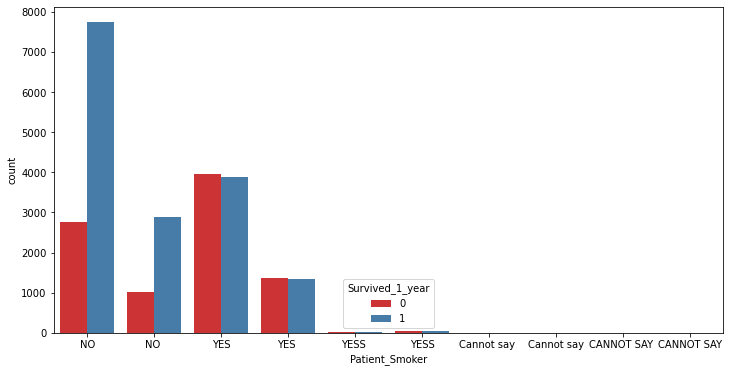

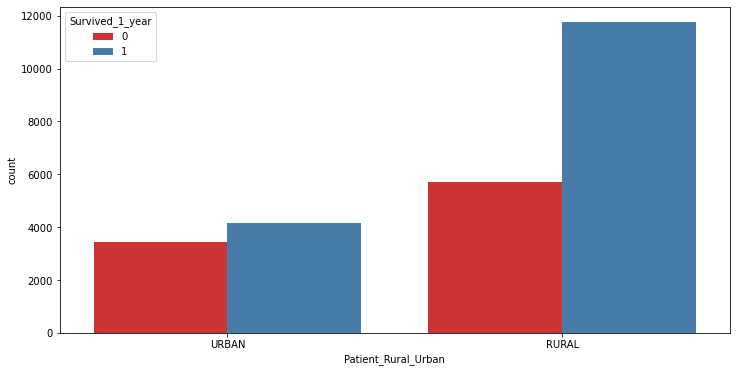

In [15]:
# Visualization of categorical columns
for col in ['Patient_Smoker', 'Patient_Rural_Urban']:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col,  hue='Survived_1_year', data=train_data, palette="Set1")
    plt.show()

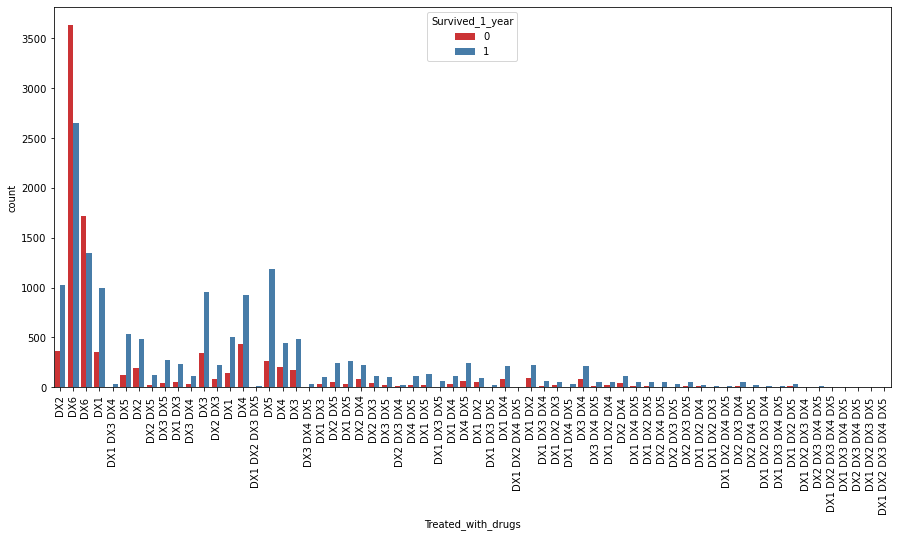

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x=cat_cols.Treated_with_drugs.str.upper(),  hue='Survived_1_year', data=train_data, palette="Set1")
plt.xticks(rotation=90)
plt.show()

In [17]:
train_data['Treated_with_drugs'] = train_data['Treated_with_drugs'].str.upper()
train_data['Treated_with_drugs'].nunique()

64

In [18]:
train_data['Treated_with_drugs'].unique()

array(['DX2', 'DX6', 'DX6 ', 'DX1', 'DX1 DX3 DX4 ', 'DX5 ', 'DX2 ',
       'DX2 DX5 ', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ', 'DX3', 'DX2 DX3',
       'DX1 ', 'DX4', 'DX1 DX2 DX3 DX5', 'DX5', 'DX4 ', 'DX3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'DX1 DX5', 'DX2 DX4',
       'DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX3 DX4 ', 'DX4 DX5 ', 'DX1 DX5 ',
       'DX1 DX3 DX5', 'DX1 DX4 ', 'DX4 DX5', 'DX1 DX2 ', 'DX1 DX3 DX5 ',
       'DX1 DX4', 'DX1 DX2 DX4 DX5 ', 'DX1 DX2', 'DX1 DX3 DX4',
       'DX1 DX2 DX3', 'DX1 DX4 DX5 ', 'DX3 DX4', 'DX3 DX4 DX5',
       'DX1 DX2 DX4', 'DX2 DX4 ', 'DX1 DX4 DX5', 'DX1 DX2 DX5',
       'DX2 DX4 DX5', 'DX2 DX3 DX5 ', 'DX2 DX3 DX5', 'DX1 DX2 DX4 ',
       'DX1 DX2 DX3 ', nan, 'DX1 DX2 DX4 DX5', 'DX2 DX3 DX4',
       'DX2 DX4 DX5 ', 'DX1 DX2 DX3 DX4', 'DX1 DX3 DX4 DX5',
       'DX1 DX2 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX2 DX3 DX4 DX5',
       'DX1 DX2 DX3 DX4 DX5', 'DX1 DX3 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ',
       'DX1 DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [19]:
# Since there are nan values in this column, it needs to be imputed before categorical encoding
train_data['Treated_with_drugs'].fillna(train_data.Treated_with_drugs.mode()[0], inplace=True)

In [20]:
train_data.Treated_with_drugs.isnull().sum()

0

In [21]:
drugs_encoded = train_data['Treated_with_drugs'].str.get_dummies(sep=' ')
drugs_encoded.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [22]:
train_data = pd.concat([train_data, drugs_encoded], axis = 1)

In [23]:
# Dropping treated with drugs column as it has been encoded
train_data.drop('Treated_with_drugs', axis=1, inplace=True)

In [24]:
train_data.Patient_Smoker.value_counts()

NO             10511
YES             7833
NO              3891
YES             2710
YESS             100
YESS              26
Cannot say         4
Cannot say         2
CANNOT SAY         1
CANNOT SAY         1
Name: Patient_Smoker, dtype: int64

In [25]:
train_data.Patient_Smoker.unique()

array(['NO', 'NO ', 'YES', 'YES ', 'YESS ', 'YESS', 'Cannot say ',
       'Cannot say', 'CANNOT SAY ', 'CANNOT SAY'], dtype=object)

In [26]:
train_data['Patient_Smoker'] = train_data['Patient_Smoker'].replace('NO ', 'NO').replace('YES ', 'YES').replace('YESS', 'YES').replace('YESS ','YES').replace('Cannot say ','NO').replace('Cannot say','NO').replace('CANNOT SAY','NO').replace('CANNOT SAY ','NO')

In [27]:
train_data['Patient_Rural_Urban'].value_counts(dropna=False)

RURAL    17482
URBAN     7597
Name: Patient_Rural_Urban, dtype: int64

In [28]:
train_data = pd.get_dummies(train_data, columns=['Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition'])
train_data.tail()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
25074,3233,2,2491,33,20.825297,1.0,0.0,1.0,0.0,1.0,...,0,1,1,0,0,1,0,1,0,1
25075,31394,21,2806,60,22.679810,1.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,1
25076,28315,18,11733,51,19.952023,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,1,1,0,1
25077,1338,4,8577,21,20.681303,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,1,1
25078,16072,18,10629,54,21.830371,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,1,0,1,0,1


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Patient_Care_Situation        25079 non-null  int64  
 1   Diagnosed_Condition              25079 non-null  int64  
 2   Patient_ID                       25079 non-null  int64  
 3   Patient_Age                      25079 non-null  int64  
 4   Patient_Body_Mass_Index          25079 non-null  float64
 5   A                                23723 non-null  float64
 6   B                                23723 non-null  float64
 7   C                                23723 non-null  float64
 8   D                                23723 non-null  float64
 9   E                                23723 non-null  float64
 10  F                                23723 non-null  float64
 11  Z                                23723 non-null  float64
 12  Number_of_prev_con

#### Pre-Processing for Numerical Columns

In [30]:
train_data.Patient_ID.nunique()

10599

In [31]:
Patient_IDCount_df = train_data.Patient_ID.value_counts().rename_axis('Unique_Patient_IDs').reset_index(name='Counts')

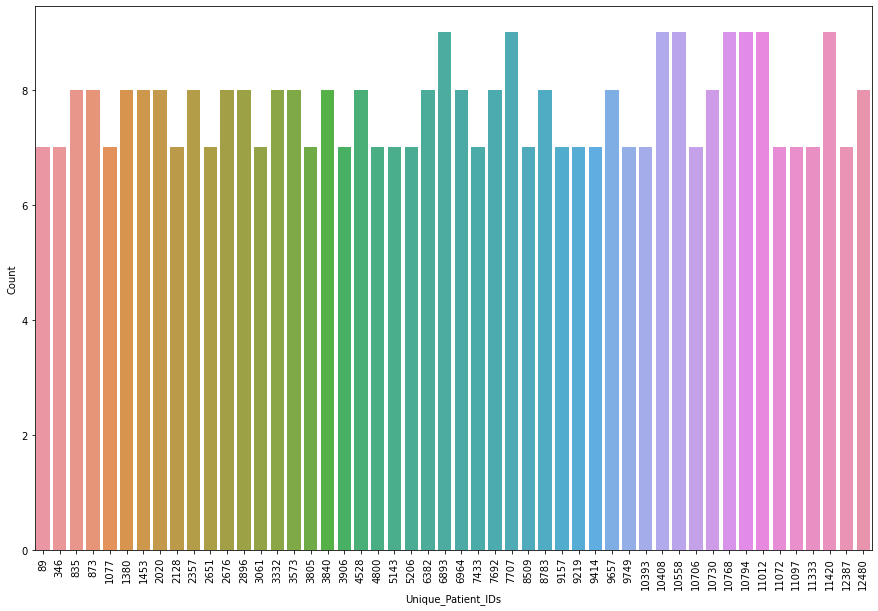

In [32]:
# Plotting the bar chart of top 50 Patient ID based on their occurrences
top_50_PIDs = Patient_IDCount_df.nlargest(columns='Counts', n=50)
plt.figure(figsize=(15,10))
ax = sns.barplot(data=top_50_PIDs, x='Unique_Patient_IDs', y='Counts')
plt.xticks(rotation=90)
ax.set(ylabel = 'Count')
plt.show()

#### Some patients have visited multiple times for treatment (maximum 9 times) with Patient IDs: {6893, 7707, 10408, 10558, 10768, ..}

In [33]:
train_data.ID_Patient_Care_Situation.nunique()

23097

In [34]:
# As ID_Patient_Care_Situation contains all unique values, so it can be dropped.
train_data.drop('ID_Patient_Care_Situation',axis=1, inplace=True)

In [35]:
train_data['A'].fillna(train_data['A'].mode()[0],inplace=True)
train_data['B'].fillna(train_data['B'].mode()[0],inplace=True)
train_data['C'].fillna(train_data['C'].mode()[0],inplace=True)
train_data['D'].fillna(train_data['D'].mode()[0],inplace=True)
train_data['E'].fillna(train_data['E'].mode()[0],inplace=True)
train_data['F'].fillna(train_data['F'].mode()[0],inplace=True)
train_data['Z'].fillna(train_data['Z'].mode()[0],inplace=True)

In [36]:
train_data['Number_of_prev_cond'].fillna(train_data['A'] + train_data['B'] + train_data['C'] + train_data['D'] + train_data['E'] + train_data['F'] + train_data['Z'], inplace = True)

In [37]:
train_data.isnull().sum()

Diagnosed_Condition                0
Patient_ID                         0
Patient_Age                        0
Patient_Body_Mass_Index            0
A                                  0
B                                  0
C                                  0
D                                  0
E                                  0
F                                  0
Z                                  0
Number_of_prev_cond                0
Survived_1_year                    0
DX1                                0
DX2                                0
DX3                                0
DX4                                0
DX5                                0
DX6                                0
Patient_Smoker_NO                  0
Patient_Smoker_YES                 0
Patient_Rural_Urban_RURAL          0
Patient_Rural_Urban_URBAN          0
Patient_mental_condition_Stable    0
dtype: int64

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Diagnosed_Condition              25079 non-null  int64  
 1   Patient_ID                       25079 non-null  int64  
 2   Patient_Age                      25079 non-null  int64  
 3   Patient_Body_Mass_Index          25079 non-null  float64
 4   A                                25079 non-null  float64
 5   B                                25079 non-null  float64
 6   C                                25079 non-null  float64
 7   D                                25079 non-null  float64
 8   E                                25079 non-null  float64
 9   F                                25079 non-null  float64
 10  Z                                25079 non-null  float64
 11  Number_of_prev_cond              25079 non-null  float64
 12  Survived_1_year   

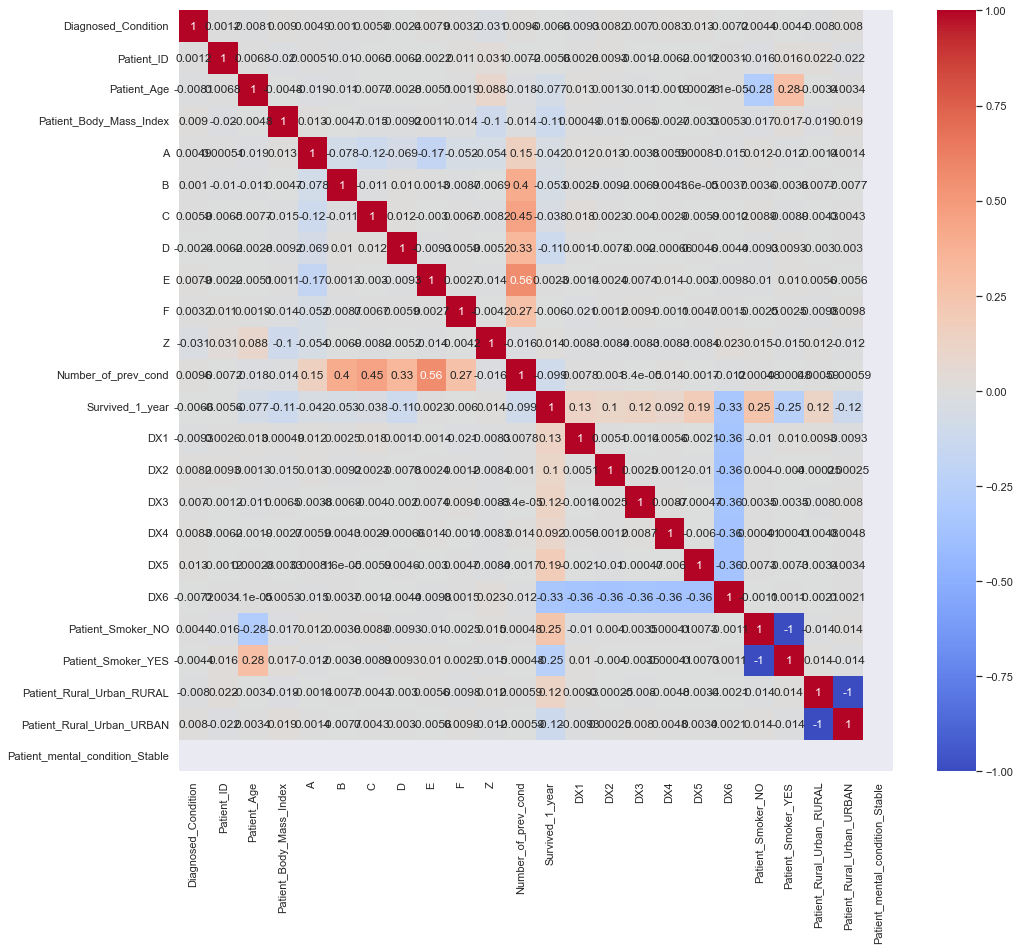

In [39]:
# Heatmap showing Correlation between features
plt.figure(figsize=(16,14))
sns.set(font_scale=1.0)
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [40]:
# Dropping Patient_mental_condition_Stable because it has one category and it is the least related to the target column
train_data.drop('Patient_mental_condition_Stable',axis=1, inplace=True)

In [41]:
train_data.Survived_1_year.value_counts()

1    15908
0     9171
Name: Survived_1_year, dtype: int64

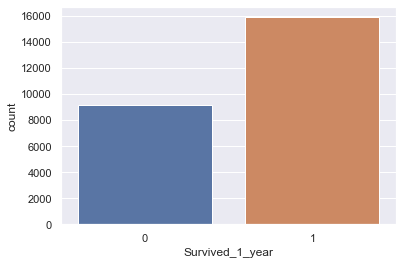

In [42]:
# Countplot of the target column
sns.countplot(x='Survived_1_year',data=train_data)
plt.show()

#### Train Test Split

In [43]:
X = train_data.drop(['Survived_1_year'],axis=1)
y = train_data['Survived_1_year']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        25079 non-null  int64  
 1   Patient_ID                 25079 non-null  int64  
 2   Patient_Age                25079 non-null  int64  
 3   Patient_Body_Mass_Index    25079 non-null  float64
 4   A                          25079 non-null  float64
 5   B                          25079 non-null  float64
 6   C                          25079 non-null  float64
 7   D                          25079 non-null  float64
 8   E                          25079 non-null  float64
 9   F                          25079 non-null  float64
 10  Z                          25079 non-null  float64
 11  Number_of_prev_cond        25079 non-null  float64
 12  DX1                        25079 non-null  int64  
 13  DX2                        25079 non-null  int

In [45]:
y

0        1
1        0
2        1
3        0
4        1
        ..
25074    1
25075    0
25076    1
25077    1
25078    1
Name: Survived_1_year, Length: 25079, dtype: int64

#### Test Data Pre-Processing

In [46]:
test_data = testing_data.copy(deep=True)

In [47]:
test_data.Treated_with_drugs = test_data.Treated_with_drugs.str.upper()

In [48]:
test_drugs_encoded = test_data.Treated_with_drugs.str.get_dummies(sep=' ')

In [49]:
test_data = pd.concat([test_data, test_drugs_encoded], axis=1)

In [50]:
test_data['Patient_Smoker'] = test_data['Patient_Smoker'].replace('NO ', 'NO').replace('YES ', 'YES').replace('YESS', 'YES').replace('YESS ','YES').replace('Cannot say ','NO').replace('Cannot say','NO').replace('CANNOT SAY','NO').replace('CANNOT SAY ','NO')

In [51]:
test_data = pd.get_dummies(test_data, columns=['Patient_Smoker','Patient_Rural_Urban'])

In [52]:
test_data.drop(['Patient_mental_condition', 'Treated_with_drugs'], axis=1, inplace=True)

In [53]:
test_data.drop('ID_Patient_Care_Situation', axis=1, inplace=True)

In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9330 non-null   int64  
 1   Patient_ID                 9330 non-null   int64  
 2   Patient_Age                9330 non-null   int64  
 3   Patient_Body_Mass_Index    9330 non-null   float64
 4   A                          9330 non-null   float64
 5   B                          9330 non-null   float64
 6   C                          9330 non-null   float64
 7   D                          9330 non-null   float64
 8   E                          9330 non-null   float64
 9   F                          9330 non-null   float64
 10  Z                          9330 non-null   float64
 11  Number_of_prev_cond        9330 non-null   float64
 12  DX1                        9330 non-null   int64  
 13  DX2                        9330 non-null   int64

### Logistic Regression

In [55]:
logreg=LogisticRegression() 
logreg.fit(X_train,y_train) 
y_train_pred_logreg = logreg.predict(X_val)
f1_score(y_val, y_train_pred_logreg)

0.7893815635939322

In [56]:
y_pred_lr = logreg.predict(test_data)
final_df_lr=pd.DataFrame()
final_df_lr['prediction']=y_pred_lr
final_df_lr.to_csv('Predictions_lr.csv', index=False)

### Random Forest

In [134]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
f1_score(y_val, rf.predict(X_val))

0.8736517719568566

In [135]:
rf_pred = rf.predict(test_data)
final_df_rf=pd.DataFrame()
final_df_rf['prediction']=rf_pred
final_df_rf.to_csv('Predictions_rf.csv', index=False)

### Support Vector Machines

In [136]:
svm = SVC()
svm.fit(X_train, y_train)
f1_score(y_val, svm.predict(X_val))

0.7788192331101644

In [137]:
svm_pred = svm.predict(test_data)
final_df_svm=pd.DataFrame()
final_df_svm['prediction']=svm_pred
final_df_svm.to_csv('Predictions_svm.csv', index=False)

### XGBoost

In [55]:
xgb = XGBClassifier(verbosity=0)
xgb.fit(X_train, y_train)
f1_score(y_val, xgb.predict(X_val))

0.8774570024570024

In [56]:
xgb_pred = xgb.predict(test_data)
final_df_xgb = pd.DataFrame()
final_df_xgb['prediction'] = xgb_pred
final_df_xgb.to_csv('Predictions_xgb.csv', index=False)

In [86]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

In [93]:
# XGBoost Hyperparameter Tuning using Grid Search CV
params_xgb = {
    'max_depth': [5,6,7,8],
    'n_estimators': [300,350,400,450],
    'learning_rate': [0.065,0.07,0.075,0.08]
}

grid_xgb = GridSearchCV(
    estimator = xgb,
    param_grid=params_xgb,
    scoring = 'f1',
    cv = 3,
    n_jobs=-1,
    verbose=True
)

grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=16,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.065, 0.07, 0.075, 0.08],
                         'max_depth': [5, 6, 7, 8],
                         'n_estimators': [300, 350, 400, 450]},
             scoring='f1', verbose=True)

In [94]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_xgb.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_xgb.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

 The best score across ALL searched params:
 0.8759727719412785

 The best parameters across ALL searched params:
 {'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 300}


In [95]:
f1_score(y_val, grid_xgb.predict(X_val))

0.8813092688895687

In [180]:
# XGBoost Hyperparameter Tuning using Randomized Search CV
params_xgb = {
    'max_depth': [5,6,7,8],
    'n_estimators': [300,350,400,450],
    'learning_rate': [0.065,0.07,0.075,0.08]
}

random_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions=params_xgb,
    scoring = 'f1',
    cv = 3,
    n_jobs=-1,
    verbose=True
)

random_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=16,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact',
                                           validate_parameters=1, verbosity=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.065, 0.07, 0.075,
                                                          0.08],
                                        'max_depth': [5, 6, 7, 8],
                                        'n_estimators': [300, 350, 400, 450]},
                   scoring='f1', verbose=True)

In [181]:
print(" Results from Randomized Search " )
print("\n The best estimator across ALL searched params:\n",random_xgb.best_estimator_)
print("\n The best score across ALL searched params:\n",random_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n",random_xgb.best_params_)

f1_score(y_val, random_xgb.predict(X_val))

 Results from Randomized Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.065, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

 The best score across ALL searched params:
 0.874823632088237

 The best parameters across ALL searched params:
 {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.065}


0.881298820646347

In [ ]:
# XGBoost Hyperparameter Tuning using Bayesian Optimization
params_xgb = {
    'max_depth': [5,6,7,8],
    'n_estimators': [300,350,400,450],
    'learning_rate': [0.065,0.07,0.075,0.08]
}

random_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions=params_xgb,
    scoring = 'f1',
    cv = 3,
    n_jobs=-1,
    verbose=True
)

random_xgb.fit(X_train, y_train)

### Decision Trees

In [138]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
f1_score(y_val, dt.predict(X_val))

0.8403256105197245

In [139]:
dt_pred = dt.predict(test_data)
final_df_dt = pd.DataFrame()
final_df_dt['prediction'] = dt_pred
final_df_dt.to_csv('Predictions_dt.csv', index=False)

### LightGBM

In [140]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
f1_score(y_val, lgbm.predict(X_val))

0.8765641897111076

In [142]:
y_pred_lgbm = lgbm.predict(test_data)
final_df_lgbm=pd.DataFrame()
final_df_lgbm['prediction']=y_pred_lgbm
final_df_lgbm.to_csv('Predictions_lgbm.csv', index=False)

### Feature Importances/Feature Selection

#### Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. Here, I will be extracting the most important features which contribute the most to the prediction of the target variable. This will help me eliminate redundant and irrelevant data.

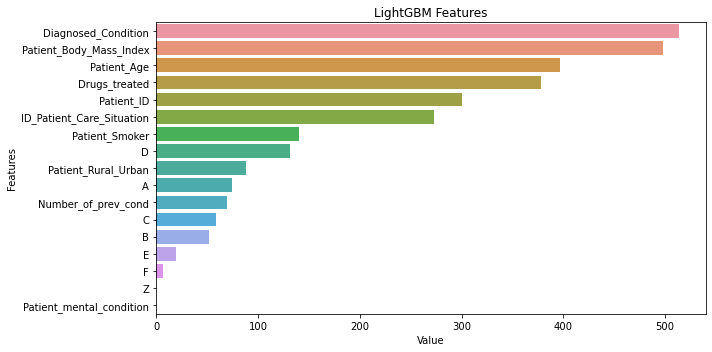

<Figure size 432x288 with 0 Axes>

In [50]:
# Plotting feature importances in descending order
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,X.columns)), columns=['Value','Features'])

plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Features", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


#### Features/Columns 'Z', 'Patient_mental_condition' have the lowest scores, so they can be removed. And the columns containing IDs like Patient_ID and ID_Patient_Care_Situation can be removed too.

In [51]:
X.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D',
       'E', 'F', 'Z', 'Number_of_prev_cond', 'Drugs_treated'],
      dtype='object')

In [52]:
# Creating X variable again with all the important features only.
X_imp = X[['Diagnosed_Condition',
       'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'A', 'B', 'C', 'D',
       'E', 'F', 'Number_of_prev_cond', 'Drugs_treated']]

In [53]:
# Fitting/Training the best model with the important features
lgbm_imp = LGBMClassifier()
lgbm_imp.fit(X_imp, y)

LGBMClassifier()

In [54]:
f1_score(y, lgbm_imp.predict(X_imp))

0.8828783221840534

In [55]:
# Creating the test variable with all the important features only
Test_imp = Test[['Diagnosed_Condition',
       'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'A', 'B', 'C', 'D',
       'E', 'F', 'Number_of_prev_cond', 'Drugs_treated']]

In [56]:
# Performing predictions on the newly created test variable in the above cell
y_pred_lgbm_imp = lgbm_imp.predict(Test_imp)
final_df_lgbm=pd.DataFrame()
final_df_lgbm['prediction']=y_pred_lgbm_imp
final_df_lgbm.to_csv('Predictions_lgbm_imp.csv', index=False)

### Hyperparameter Tuning

#### Hyperparameter tuning is choosing a set of optimal hyperparameters for the learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning. I will be performing GridSearch Cross Validation to find the best parameters for LightGBM model from the set of parameters defined below.

In [57]:
param_grid_lgbm =  {'boosting': ['gbdt'],  
                     'metric': ['l2_root'],
                     'learning_rate': [0.05], 
                     'num_iterations': [1000],
                     'num_leaves': [30],
                     'max_depth': [-1],
                     'min_data_in_leaf': [4],
                     'bagging_fraction': [0.78],
                     'bagging_freq': [1],
                     'feature_fraction': [0.65],
                    }

# Run grid search 
grid = GridSearchCV(lgbm_imp, param_grid = param_grid_lgbm, verbose = 3, n_jobs = -1) 
# fit the model for grid search 
grid.fit(X_train, y_train)
# Find the best estimators
grid.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\abhij\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMClassifier(bagging_fraction=0.78, bagging_freq=1, boosting='gbdt',
               feature_fraction=0.65, learning_rate=0.05, metric='l2_root',
               min_data_in_leaf=4, num_iterations=1000, num_leaves=30)

In [58]:
best_lgbm = grid.best_estimator_
best_lgbm.fit(X_imp, y)
y_pred_lgbm_best = best_lgbm.predict(Test_imp)
final_df_lgbm_best=pd.DataFrame()
final_df_lgbm_best['prediction']=y_pred_lgbm_best
final_df_lgbm_best.to_csv('Predictions_lgbm_best.csv', index=False)

C:\Users\abhij\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


### AdaBoost

In [144]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
f1_score(y_val, ada.predict(X_val))

0.8648078372268273

In [145]:
y_pred_ada = ada.predict(test_data)
final_df_ada=pd.DataFrame()
final_df_ada['prediction']=y_pred_ada
final_df_ada.to_csv('Predictions_ada.csv', index=False)

### CatBoost

In [57]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
f1_score(y_val, cat.predict(X_val))

Learning rate set to 0.037073
0:	learn: 0.6741018	total: 147ms	remaining: 2m 26s
1:	learn: 0.6574306	total: 151ms	remaining: 1m 15s
2:	learn: 0.6417355	total: 169ms	remaining: 56.2s
3:	learn: 0.6275342	total: 184ms	remaining: 45.8s
4:	learn: 0.6138590	total: 190ms	remaining: 37.8s
5:	learn: 0.6012944	total: 195ms	remaining: 32.3s
6:	learn: 0.5898408	total: 201ms	remaining: 28.5s
7:	learn: 0.5776806	total: 206ms	remaining: 25.6s
8:	learn: 0.5689111	total: 212ms	remaining: 23.3s
9:	learn: 0.5598919	total: 217ms	remaining: 21.5s
10:	learn: 0.5500482	total: 222ms	remaining: 20s
11:	learn: 0.5408477	total: 227ms	remaining: 18.7s
12:	learn: 0.5325363	total: 231ms	remaining: 17.6s
13:	learn: 0.5246219	total: 236ms	remaining: 16.6s
14:	learn: 0.5184930	total: 241ms	remaining: 15.8s
15:	learn: 0.5112852	total: 258ms	remaining: 15.9s
16:	learn: 0.5061060	total: 268ms	remaining: 15.5s
17:	learn: 0.5016066	total: 274ms	remaining: 14.9s
18:	learn: 0.4969036	total: 289ms	remaining: 14.9s
19:	learn: 

161:	learn: 0.3526440	total: 1.52s	remaining: 7.87s
162:	learn: 0.3524952	total: 1.53s	remaining: 7.84s
163:	learn: 0.3522873	total: 1.53s	remaining: 7.81s
164:	learn: 0.3518598	total: 1.54s	remaining: 7.78s
165:	learn: 0.3514468	total: 1.54s	remaining: 7.75s
166:	learn: 0.3511878	total: 1.56s	remaining: 7.79s
167:	learn: 0.3509559	total: 1.57s	remaining: 7.76s
168:	learn: 0.3507290	total: 1.57s	remaining: 7.73s
169:	learn: 0.3504734	total: 1.58s	remaining: 7.7s
170:	learn: 0.3502532	total: 1.58s	remaining: 7.68s
171:	learn: 0.3498538	total: 1.59s	remaining: 7.65s
172:	learn: 0.3497417	total: 1.59s	remaining: 7.62s
173:	learn: 0.3496263	total: 1.6s	remaining: 7.59s
174:	learn: 0.3493225	total: 1.6s	remaining: 7.56s
175:	learn: 0.3490801	total: 1.62s	remaining: 7.6s
176:	learn: 0.3488043	total: 1.63s	remaining: 7.58s
177:	learn: 0.3484800	total: 1.63s	remaining: 7.55s
178:	learn: 0.3482027	total: 1.64s	remaining: 7.52s
179:	learn: 0.3480284	total: 1.65s	remaining: 7.5s
180:	learn: 0.347

327:	learn: 0.3206707	total: 2.66s	remaining: 5.44s
328:	learn: 0.3205706	total: 2.66s	remaining: 5.43s
329:	learn: 0.3204329	total: 2.67s	remaining: 5.42s
330:	learn: 0.3202971	total: 2.68s	remaining: 5.41s
331:	learn: 0.3201619	total: 2.68s	remaining: 5.4s
332:	learn: 0.3199269	total: 2.69s	remaining: 5.38s
333:	learn: 0.3198096	total: 2.7s	remaining: 5.39s
334:	learn: 0.3196993	total: 2.71s	remaining: 5.37s
335:	learn: 0.3194834	total: 2.73s	remaining: 5.4s
336:	learn: 0.3192800	total: 2.74s	remaining: 5.39s
337:	learn: 0.3191661	total: 2.75s	remaining: 5.38s
338:	learn: 0.3189543	total: 2.75s	remaining: 5.37s
339:	learn: 0.3188363	total: 2.76s	remaining: 5.35s
340:	learn: 0.3187155	total: 2.76s	remaining: 5.34s
341:	learn: 0.3185038	total: 2.77s	remaining: 5.33s
342:	learn: 0.3183722	total: 2.77s	remaining: 5.31s
343:	learn: 0.3182406	total: 2.79s	remaining: 5.33s
344:	learn: 0.3180591	total: 2.81s	remaining: 5.33s
345:	learn: 0.3179537	total: 2.81s	remaining: 5.32s
346:	learn: 0.3

490:	learn: 0.3012824	total: 3.82s	remaining: 3.96s
491:	learn: 0.3011965	total: 3.83s	remaining: 3.95s
492:	learn: 0.3010851	total: 3.83s	remaining: 3.94s
493:	learn: 0.3009951	total: 3.84s	remaining: 3.93s
494:	learn: 0.3009422	total: 3.84s	remaining: 3.92s
495:	learn: 0.3008502	total: 3.86s	remaining: 3.92s
496:	learn: 0.3007738	total: 3.87s	remaining: 3.91s
497:	learn: 0.3006666	total: 3.87s	remaining: 3.9s
498:	learn: 0.3005361	total: 3.88s	remaining: 3.89s
499:	learn: 0.3004199	total: 3.88s	remaining: 3.88s
500:	learn: 0.3003275	total: 3.88s	remaining: 3.87s
501:	learn: 0.3002258	total: 3.89s	remaining: 3.86s
502:	learn: 0.3001511	total: 3.9s	remaining: 3.85s
503:	learn: 0.3000695	total: 3.9s	remaining: 3.84s
504:	learn: 0.2999848	total: 3.91s	remaining: 3.83s
505:	learn: 0.2999044	total: 3.91s	remaining: 3.82s
506:	learn: 0.2998010	total: 3.92s	remaining: 3.81s
507:	learn: 0.2997109	total: 3.94s	remaining: 3.81s
508:	learn: 0.2995715	total: 3.95s	remaining: 3.81s
509:	learn: 0.2

663:	learn: 0.2861383	total: 5.14s	remaining: 2.6s
664:	learn: 0.2860147	total: 5.15s	remaining: 2.59s
665:	learn: 0.2859485	total: 5.15s	remaining: 2.58s
666:	learn: 0.2858820	total: 5.16s	remaining: 2.57s
667:	learn: 0.2857771	total: 5.17s	remaining: 2.57s
668:	learn: 0.2856787	total: 5.18s	remaining: 2.56s
669:	learn: 0.2855755	total: 5.19s	remaining: 2.56s
670:	learn: 0.2855128	total: 5.19s	remaining: 2.55s
671:	learn: 0.2854485	total: 5.2s	remaining: 2.54s
672:	learn: 0.2853753	total: 5.2s	remaining: 2.53s
673:	learn: 0.2852914	total: 5.22s	remaining: 2.52s
674:	learn: 0.2852260	total: 5.23s	remaining: 2.52s
675:	learn: 0.2851660	total: 5.24s	remaining: 2.51s
676:	learn: 0.2850654	total: 5.24s	remaining: 2.5s
677:	learn: 0.2849910	total: 5.25s	remaining: 2.49s
678:	learn: 0.2849220	total: 5.25s	remaining: 2.48s
679:	learn: 0.2848449	total: 5.27s	remaining: 2.48s
680:	learn: 0.2847595	total: 5.27s	remaining: 2.47s
681:	learn: 0.2846790	total: 5.28s	remaining: 2.46s
682:	learn: 0.28

832:	learn: 0.2738075	total: 6.49s	remaining: 1.3s
833:	learn: 0.2737190	total: 6.5s	remaining: 1.29s
834:	learn: 0.2736519	total: 6.51s	remaining: 1.29s
835:	learn: 0.2735965	total: 6.51s	remaining: 1.28s
836:	learn: 0.2735254	total: 6.52s	remaining: 1.27s
837:	learn: 0.2734626	total: 6.53s	remaining: 1.26s
838:	learn: 0.2733836	total: 6.53s	remaining: 1.25s
839:	learn: 0.2732945	total: 6.54s	remaining: 1.24s
840:	learn: 0.2732175	total: 6.55s	remaining: 1.24s
841:	learn: 0.2731371	total: 6.55s	remaining: 1.23s
842:	learn: 0.2730532	total: 6.56s	remaining: 1.22s
843:	learn: 0.2729951	total: 6.57s	remaining: 1.21s
844:	learn: 0.2728968	total: 6.57s	remaining: 1.21s
845:	learn: 0.2728079	total: 6.58s	remaining: 1.2s
846:	learn: 0.2727475	total: 6.58s	remaining: 1.19s
847:	learn: 0.2726901	total: 6.58s	remaining: 1.18s
848:	learn: 0.2726335	total: 6.59s	remaining: 1.17s
849:	learn: 0.2725339	total: 6.6s	remaining: 1.16s
850:	learn: 0.2724629	total: 6.6s	remaining: 1.16s
851:	learn: 0.272

999:	learn: 0.2629621	total: 7.61s	remaining: 0us


0.8821362799263351

In [79]:
cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.03707300126552582,
 'score_fu

In [58]:
y_pred_cat = cat.predict(test_data)
final_df_cat=pd.DataFrame()
final_df_cat['prediction']=y_pred_cat
final_df_cat.to_csv('Predictions_cat.csv', index=False)

### Hyperparameter Tuning

#### Hyperparameter tuning is choosing a set of optimal hyperparameters for the learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning. I will be performing GridSearch Cross Validation to find the best parameters for CatBoost model from the set of parameters defined below.

In [96]:
parameters = {'depth'         : [4,5,6,7,8],
              'learning_rate' : [0.035,0.036,0.037,0.038,0.039],
              #'iterations'    : [10, 20,30,40,50,60,70,80,90,100],
              'n_estimators'  : [400,450,500,550,600],
              
             }

In [97]:
Grid_cat = GridSearchCV(estimator=cat, param_grid = parameters, cv = 3, n_jobs=-1)
Grid_cat.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_cat.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_cat.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_cat.best_params_)

0:	learn: 0.6736403	total: 5.92ms	remaining: 3.25s
1:	learn: 0.6566019	total: 11.5ms	remaining: 3.15s
2:	learn: 0.6405996	total: 17.7ms	remaining: 3.23s
3:	learn: 0.6261576	total: 23ms	remaining: 3.14s
4:	learn: 0.6122753	total: 28.2ms	remaining: 3.07s
5:	learn: 0.5995519	total: 33.4ms	remaining: 3.03s
6:	learn: 0.5879687	total: 38.7ms	remaining: 3s
7:	learn: 0.5756716	total: 43.8ms	remaining: 2.97s
8:	learn: 0.5668370	total: 49ms	remaining: 2.95s
9:	learn: 0.5577560	total: 54.3ms	remaining: 2.93s
10:	learn: 0.5478330	total: 59.5ms	remaining: 2.92s
11:	learn: 0.5385157	total: 64.7ms	remaining: 2.9s
12:	learn: 0.5305243	total: 69.9ms	remaining: 2.89s
13:	learn: 0.5240734	total: 75.4ms	remaining: 2.89s
14:	learn: 0.5171022	total: 81.1ms	remaining: 2.89s
15:	learn: 0.5116204	total: 90.3ms	remaining: 3.01s
16:	learn: 0.5060087	total: 95.6ms	remaining: 3s
17:	learn: 0.5017853	total: 101ms	remaining: 2.98s
18:	learn: 0.4973304	total: 106ms	remaining: 2.96s
19:	learn: 0.4929389	total: 111ms	r

167:	learn: 0.3500561	total: 1.32s	remaining: 2.99s
168:	learn: 0.3498007	total: 1.33s	remaining: 2.99s
169:	learn: 0.3494258	total: 1.33s	remaining: 2.98s
170:	learn: 0.3490009	total: 1.34s	remaining: 2.98s
171:	learn: 0.3487072	total: 1.36s	remaining: 2.99s
172:	learn: 0.3485526	total: 1.36s	remaining: 2.97s
173:	learn: 0.3483211	total: 1.37s	remaining: 2.97s
174:	learn: 0.3480913	total: 1.38s	remaining: 2.95s
175:	learn: 0.3479032	total: 1.38s	remaining: 2.94s
176:	learn: 0.3474388	total: 1.39s	remaining: 2.93s
177:	learn: 0.3471317	total: 1.41s	remaining: 2.94s
178:	learn: 0.3468536	total: 1.41s	remaining: 2.92s
179:	learn: 0.3463822	total: 1.42s	remaining: 2.91s
180:	learn: 0.3461525	total: 1.42s	remaining: 2.9s
181:	learn: 0.3460857	total: 1.42s	remaining: 2.88s
182:	learn: 0.3456497	total: 1.43s	remaining: 2.87s
183:	learn: 0.3454919	total: 1.44s	remaining: 2.86s
184:	learn: 0.3452822	total: 1.44s	remaining: 2.84s
185:	learn: 0.3450173	total: 1.45s	remaining: 2.83s
186:	learn: 0

332:	learn: 0.3184824	total: 2.63s	remaining: 1.71s
333:	learn: 0.3183956	total: 2.64s	remaining: 1.71s
334:	learn: 0.3182069	total: 2.65s	remaining: 1.7s
335:	learn: 0.3181038	total: 2.66s	remaining: 1.69s
336:	learn: 0.3179088	total: 2.66s	remaining: 1.68s
337:	learn: 0.3176166	total: 2.67s	remaining: 1.68s
338:	learn: 0.3175177	total: 2.68s	remaining: 1.67s
339:	learn: 0.3173845	total: 2.68s	remaining: 1.66s
340:	learn: 0.3172504	total: 2.69s	remaining: 1.65s
341:	learn: 0.3171473	total: 2.69s	remaining: 1.64s
342:	learn: 0.3170132	total: 2.7s	remaining: 1.63s
343:	learn: 0.3168779	total: 2.7s	remaining: 1.62s
344:	learn: 0.3166976	total: 2.72s	remaining: 1.62s
345:	learn: 0.3165367	total: 2.72s	remaining: 1.61s
346:	learn: 0.3164417	total: 2.73s	remaining: 1.6s
347:	learn: 0.3162764	total: 2.73s	remaining: 1.59s
348:	learn: 0.3161706	total: 2.74s	remaining: 1.58s
349:	learn: 0.3160811	total: 2.75s	remaining: 1.57s
350:	learn: 0.3159553	total: 2.75s	remaining: 1.56s
351:	learn: 0.31

509:	learn: 0.2980578	total: 3.93s	remaining: 308ms
510:	learn: 0.2979703	total: 3.93s	remaining: 300ms
511:	learn: 0.2978875	total: 3.95s	remaining: 293ms
512:	learn: 0.2978122	total: 3.95s	remaining: 285ms
513:	learn: 0.2977315	total: 3.96s	remaining: 277ms
514:	learn: 0.2976610	total: 3.97s	remaining: 270ms
515:	learn: 0.2975636	total: 4s	remaining: 263ms
516:	learn: 0.2974724	total: 4.01s	remaining: 256ms
517:	learn: 0.2973790	total: 4.03s	remaining: 249ms
518:	learn: 0.2973201	total: 4.04s	remaining: 241ms
519:	learn: 0.2972194	total: 4.05s	remaining: 233ms
520:	learn: 0.2971389	total: 4.05s	remaining: 225ms
521:	learn: 0.2970459	total: 4.05s	remaining: 218ms
522:	learn: 0.2969668	total: 4.06s	remaining: 210ms
523:	learn: 0.2968967	total: 4.07s	remaining: 202ms
524:	learn: 0.2968003	total: 4.08s	remaining: 194ms
525:	learn: 0.2966927	total: 4.08s	remaining: 186ms
526:	learn: 0.2965912	total: 4.08s	remaining: 178ms
527:	learn: 0.2964930	total: 4.09s	remaining: 170ms
528:	learn: 0.2

In [98]:
f1_score(y_val, Grid_cat.predict(X_val))

0.8803183348637895

In [101]:
cat_features = list(range(0, X_train.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [176]:
tunned_cat = CatBoostClassifier(
    iterations=1180,
    learning_rate=0.037075,
    depth=6,
    l2_leaf_reg=3,
    random_strength=1,
    bagging_temperature=1
)

tunned_cat.fit(
    X_train, y_train,
    #cat_features=cat_features,
    verbose=False,
    eval_set=(X_val, y_val),
    plot=True
)
plt.show()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [177]:
f1_score(y_val, tunned_cat.predict(X_val))

0.8830211851396991

### KNN

In [148]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
f1_score(y_val, knn.predict(X_val))

0.7334891876095851

In [149]:
y_pred_knn = knn.predict(test_data)
final_df_knn=pd.DataFrame()
final_df_knn['prediction']=y_pred_knn
final_df_knn.to_csv('Predictions_knn.csv', index=False)

### NAIVE BAYES

In [150]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
f1_score(y_val, gnb.predict(X_val))

0.7849666983824929

In [151]:
y_pred_gnb = gnb.predict(test_data)
final_df_gnb=pd.DataFrame()
final_df_gnb['prediction']=y_pred_gnb
final_df_gnb.to_csv('Predictions_gnb.csv', index=False)

### PASSIVE AGGRESSIVE CLASSIFIER

In [152]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
f1_score(y_val, pac.predict(X_val))

0.13781512605042018

### GRADIENT BOOSTING MACHINES

In [153]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
f1_score(y_val, gbm.predict(X_val))

0.8688029020556227

In [154]:
y_pred_gbm = gbm.predict(test_data)
final_df_gbm=pd.DataFrame()
final_df_gbm['prediction']=y_pred_gbm
final_df_gbm.to_csv('Predictions_gbm.csv', index=False)

### Bagging Meta-Estimator

In [155]:
clf = BaggingClassifier(base_estimator=CatBoostClassifier(),
                        n_estimators=10, random_state=42).fit(X_train, y_train)

f1_score(y_val, clf.predict(X_val))

Learning rate set to 0.037073
0:	learn: 0.6746626	total: 15.5ms	remaining: 15.5s
1:	learn: 0.6578338	total: 19.8ms	remaining: 9.9s
2:	learn: 0.6419145	total: 24ms	remaining: 7.97s
3:	learn: 0.6282969	total: 28ms	remaining: 6.96s
4:	learn: 0.6164916	total: 32.1ms	remaining: 6.38s
5:	learn: 0.6044632	total: 36.1ms	remaining: 5.97s
6:	learn: 0.5930914	total: 44.9ms	remaining: 6.37s
7:	learn: 0.5805898	total: 61.1ms	remaining: 7.58s
8:	learn: 0.5708820	total: 65.4ms	remaining: 7.2s
9:	learn: 0.5620827	total: 76.5ms	remaining: 7.57s
10:	learn: 0.5523908	total: 92.3ms	remaining: 8.3s
11:	learn: 0.5425138	total: 96.3ms	remaining: 7.93s
12:	learn: 0.5331605	total: 108ms	remaining: 8.22s
13:	learn: 0.5270932	total: 112ms	remaining: 7.91s
14:	learn: 0.5204852	total: 124ms	remaining: 8.15s
15:	learn: 0.5147956	total: 140ms	remaining: 8.6s
16:	learn: 0.5094794	total: 156ms	remaining: 9.03s
17:	learn: 0.5044219	total: 160ms	remaining: 8.75s
18:	learn: 0.5002331	total: 171ms	remaining: 8.81s
19:	lea

176:	learn: 0.3451341	total: 1.32s	remaining: 6.13s
177:	learn: 0.3448195	total: 1.32s	remaining: 6.11s
178:	learn: 0.3443481	total: 1.34s	remaining: 6.16s
179:	learn: 0.3440913	total: 1.35s	remaining: 6.14s
180:	learn: 0.3438060	total: 1.35s	remaining: 6.12s
181:	learn: 0.3435885	total: 1.36s	remaining: 6.1s
182:	learn: 0.3433286	total: 1.36s	remaining: 6.08s
183:	learn: 0.3430438	total: 1.37s	remaining: 6.09s
184:	learn: 0.3428337	total: 1.38s	remaining: 6.07s
185:	learn: 0.3426688	total: 1.39s	remaining: 6.08s
186:	learn: 0.3424189	total: 1.39s	remaining: 6.06s
187:	learn: 0.3421678	total: 1.4s	remaining: 6.04s
188:	learn: 0.3417442	total: 1.4s	remaining: 6.01s
189:	learn: 0.3416843	total: 1.4s	remaining: 5.99s
190:	learn: 0.3412396	total: 1.41s	remaining: 5.96s
191:	learn: 0.3409442	total: 1.41s	remaining: 5.94s
192:	learn: 0.3407382	total: 1.42s	remaining: 5.92s
193:	learn: 0.3404285	total: 1.42s	remaining: 5.9s
194:	learn: 0.3400474	total: 1.42s	remaining: 5.88s
195:	learn: 0.339

348:	learn: 0.3045895	total: 2.44s	remaining: 4.55s
349:	learn: 0.3044349	total: 2.44s	remaining: 4.54s
350:	learn: 0.3042472	total: 2.45s	remaining: 4.53s
351:	learn: 0.3040141	total: 2.45s	remaining: 4.52s
352:	learn: 0.3038345	total: 2.46s	remaining: 4.51s
353:	learn: 0.3037183	total: 2.47s	remaining: 4.51s
354:	learn: 0.3035327	total: 2.48s	remaining: 4.5s
355:	learn: 0.3034039	total: 2.49s	remaining: 4.5s
356:	learn: 0.3032448	total: 2.51s	remaining: 4.51s
357:	learn: 0.3030747	total: 2.52s	remaining: 4.52s
358:	learn: 0.3028330	total: 2.53s	remaining: 4.51s
359:	learn: 0.3026714	total: 2.53s	remaining: 4.5s
360:	learn: 0.3024072	total: 2.53s	remaining: 4.49s
361:	learn: 0.3021788	total: 2.54s	remaining: 4.47s
362:	learn: 0.3019709	total: 2.54s	remaining: 4.46s
363:	learn: 0.3018146	total: 2.55s	remaining: 4.46s
364:	learn: 0.3016004	total: 2.57s	remaining: 4.47s
365:	learn: 0.3014632	total: 2.57s	remaining: 4.46s
366:	learn: 0.3011623	total: 2.58s	remaining: 4.46s
367:	learn: 0.3

512:	learn: 0.2770264	total: 3.74s	remaining: 3.55s
513:	learn: 0.2768410	total: 3.74s	remaining: 3.54s
514:	learn: 0.2766949	total: 3.75s	remaining: 3.53s
515:	learn: 0.2765190	total: 3.75s	remaining: 3.52s
516:	learn: 0.2763330	total: 3.76s	remaining: 3.51s
517:	learn: 0.2761897	total: 3.77s	remaining: 3.51s
518:	learn: 0.2760669	total: 3.77s	remaining: 3.5s
519:	learn: 0.2759195	total: 3.79s	remaining: 3.49s
520:	learn: 0.2758092	total: 3.8s	remaining: 3.5s
521:	learn: 0.2756997	total: 3.81s	remaining: 3.48s
522:	learn: 0.2755465	total: 3.81s	remaining: 3.47s
523:	learn: 0.2754039	total: 3.81s	remaining: 3.46s
524:	learn: 0.2752430	total: 3.82s	remaining: 3.45s
525:	learn: 0.2751431	total: 3.82s	remaining: 3.44s
526:	learn: 0.2749261	total: 3.83s	remaining: 3.44s
527:	learn: 0.2748180	total: 3.84s	remaining: 3.43s
528:	learn: 0.2746877	total: 3.84s	remaining: 3.42s
529:	learn: 0.2745649	total: 3.84s	remaining: 3.41s
530:	learn: 0.2744511	total: 3.85s	remaining: 3.4s
531:	learn: 0.27

693:	learn: 0.2537718	total: 5.05s	remaining: 2.23s
694:	learn: 0.2536771	total: 5.05s	remaining: 2.22s
695:	learn: 0.2535651	total: 5.06s	remaining: 2.21s
696:	learn: 0.2534434	total: 5.08s	remaining: 2.21s
697:	learn: 0.2533132	total: 5.08s	remaining: 2.2s
698:	learn: 0.2531910	total: 5.09s	remaining: 2.19s
699:	learn: 0.2530867	total: 5.09s	remaining: 2.18s
700:	learn: 0.2529430	total: 5.09s	remaining: 2.17s
701:	learn: 0.2528203	total: 5.1s	remaining: 2.16s
702:	learn: 0.2527412	total: 5.1s	remaining: 2.15s
703:	learn: 0.2526130	total: 5.11s	remaining: 2.15s
704:	learn: 0.2525084	total: 5.11s	remaining: 2.14s
705:	learn: 0.2523923	total: 5.11s	remaining: 2.13s
706:	learn: 0.2522446	total: 5.12s	remaining: 2.12s
707:	learn: 0.2521102	total: 5.12s	remaining: 2.11s
708:	learn: 0.2520048	total: 5.14s	remaining: 2.11s
709:	learn: 0.2518753	total: 5.14s	remaining: 2.1s
710:	learn: 0.2517834	total: 5.15s	remaining: 2.09s
711:	learn: 0.2517133	total: 5.15s	remaining: 2.08s
712:	learn: 0.25

855:	learn: 0.2369376	total: 6.19s	remaining: 1.04s
856:	learn: 0.2368516	total: 6.2s	remaining: 1.03s
857:	learn: 0.2367399	total: 6.21s	remaining: 1.03s
858:	learn: 0.2366711	total: 6.21s	remaining: 1.02s
859:	learn: 0.2365675	total: 6.21s	remaining: 1.01s
860:	learn: 0.2364687	total: 6.22s	remaining: 1s
861:	learn: 0.2364004	total: 6.22s	remaining: 996ms
862:	learn: 0.2363324	total: 6.23s	remaining: 989ms
863:	learn: 0.2362662	total: 6.25s	remaining: 983ms
864:	learn: 0.2361637	total: 6.25s	remaining: 976ms
865:	learn: 0.2360630	total: 6.25s	remaining: 968ms
866:	learn: 0.2359594	total: 6.26s	remaining: 960ms
867:	learn: 0.2358780	total: 6.28s	remaining: 955ms
868:	learn: 0.2357460	total: 6.28s	remaining: 947ms
869:	learn: 0.2356621	total: 6.29s	remaining: 940ms
870:	learn: 0.2355474	total: 6.29s	remaining: 932ms
871:	learn: 0.2354666	total: 6.3s	remaining: 924ms
872:	learn: 0.2353759	total: 6.3s	remaining: 917ms
873:	learn: 0.2353114	total: 6.31s	remaining: 909ms
874:	learn: 0.2352

37:	learn: 0.4415470	total: 320ms	remaining: 8.11s
38:	learn: 0.4391338	total: 325ms	remaining: 8s
39:	learn: 0.4371371	total: 331ms	remaining: 7.94s
40:	learn: 0.4352697	total: 347ms	remaining: 8.12s
41:	learn: 0.4334677	total: 361ms	remaining: 8.24s
42:	learn: 0.4316175	total: 365ms	remaining: 8.13s
43:	learn: 0.4295039	total: 376ms	remaining: 8.16s
44:	learn: 0.4277669	total: 392ms	remaining: 8.31s
45:	learn: 0.4253446	total: 408ms	remaining: 8.46s
46:	learn: 0.4234562	total: 412ms	remaining: 8.35s
47:	learn: 0.4220474	total: 424ms	remaining: 8.4s
48:	learn: 0.4207030	total: 439ms	remaining: 8.53s
49:	learn: 0.4188698	total: 443ms	remaining: 8.43s
50:	learn: 0.4178120	total: 448ms	remaining: 8.33s
51:	learn: 0.4166139	total: 471ms	remaining: 8.59s
52:	learn: 0.4149711	total: 475ms	remaining: 8.49s
53:	learn: 0.4132184	total: 503ms	remaining: 8.81s
54:	learn: 0.4119623	total: 508ms	remaining: 8.72s
55:	learn: 0.4108716	total: 512ms	remaining: 8.63s
56:	learn: 0.4100243	total: 517ms	r

200:	learn: 0.3339636	total: 1.87s	remaining: 7.42s
201:	learn: 0.3336265	total: 1.87s	remaining: 7.39s
202:	learn: 0.3333946	total: 1.88s	remaining: 7.36s
203:	learn: 0.3331755	total: 1.89s	remaining: 7.38s
204:	learn: 0.3328158	total: 1.91s	remaining: 7.4s
205:	learn: 0.3324668	total: 1.92s	remaining: 7.42s
206:	learn: 0.3323100	total: 1.94s	remaining: 7.43s
207:	learn: 0.3321425	total: 1.96s	remaining: 7.45s
208:	learn: 0.3317591	total: 1.97s	remaining: 7.46s
209:	learn: 0.3313962	total: 1.99s	remaining: 7.48s
210:	learn: 0.3311866	total: 2s	remaining: 7.49s
211:	learn: 0.3309455	total: 2.02s	remaining: 7.51s
212:	learn: 0.3307108	total: 2.05s	remaining: 7.58s
213:	learn: 0.3304125	total: 2.07s	remaining: 7.59s
214:	learn: 0.3301532	total: 2.07s	remaining: 7.56s
215:	learn: 0.3299719	total: 2.08s	remaining: 7.55s
216:	learn: 0.3297749	total: 2.1s	remaining: 7.57s
217:	learn: 0.3295200	total: 2.11s	remaining: 7.58s
218:	learn: 0.3293447	total: 2.12s	remaining: 7.55s
219:	learn: 0.328

371:	learn: 0.2963498	total: 3.49s	remaining: 5.89s
372:	learn: 0.2962176	total: 3.5s	remaining: 5.89s
373:	learn: 0.2960510	total: 3.52s	remaining: 5.89s
374:	learn: 0.2958759	total: 3.52s	remaining: 5.87s
375:	learn: 0.2957314	total: 3.53s	remaining: 5.85s
376:	learn: 0.2955968	total: 3.53s	remaining: 5.83s
377:	learn: 0.2953926	total: 3.53s	remaining: 5.82s
378:	learn: 0.2952763	total: 3.54s	remaining: 5.8s
379:	learn: 0.2951517	total: 3.54s	remaining: 5.78s
380:	learn: 0.2949170	total: 3.55s	remaining: 5.77s
381:	learn: 0.2947320	total: 3.57s	remaining: 5.77s
382:	learn: 0.2945778	total: 3.58s	remaining: 5.77s
383:	learn: 0.2943899	total: 3.59s	remaining: 5.75s
384:	learn: 0.2942248	total: 3.59s	remaining: 5.74s
385:	learn: 0.2940556	total: 3.59s	remaining: 5.72s
386:	learn: 0.2938102	total: 3.6s	remaining: 5.7s
387:	learn: 0.2936381	total: 3.61s	remaining: 5.7s
388:	learn: 0.2934667	total: 3.63s	remaining: 5.7s
389:	learn: 0.2933282	total: 3.63s	remaining: 5.68s
390:	learn: 0.2931

533:	learn: 0.2719774	total: 5.22s	remaining: 4.56s
534:	learn: 0.2718664	total: 5.23s	remaining: 4.54s
535:	learn: 0.2717191	total: 5.23s	remaining: 4.53s
536:	learn: 0.2716250	total: 5.24s	remaining: 4.51s
537:	learn: 0.2714933	total: 5.27s	remaining: 4.52s
538:	learn: 0.2713435	total: 5.27s	remaining: 4.51s
539:	learn: 0.2712273	total: 5.3s	remaining: 4.51s
540:	learn: 0.2711046	total: 5.31s	remaining: 4.51s
541:	learn: 0.2710071	total: 5.33s	remaining: 4.5s
542:	learn: 0.2708949	total: 5.34s	remaining: 4.5s
543:	learn: 0.2707673	total: 5.35s	remaining: 4.48s
544:	learn: 0.2706614	total: 5.36s	remaining: 4.47s
545:	learn: 0.2705165	total: 5.36s	remaining: 4.46s
546:	learn: 0.2703432	total: 5.37s	remaining: 4.45s
547:	learn: 0.2702308	total: 5.38s	remaining: 4.43s
548:	learn: 0.2701067	total: 5.39s	remaining: 4.43s
549:	learn: 0.2699345	total: 5.39s	remaining: 4.41s
550:	learn: 0.2697820	total: 5.4s	remaining: 4.4s
551:	learn: 0.2696183	total: 5.4s	remaining: 4.38s
552:	learn: 0.2694

716:	learn: 0.2502600	total: 7.05s	remaining: 2.78s
717:	learn: 0.2501405	total: 7.12s	remaining: 2.79s
718:	learn: 0.2500199	total: 7.12s	remaining: 2.78s
719:	learn: 0.2498885	total: 7.13s	remaining: 2.77s
720:	learn: 0.2497828	total: 7.13s	remaining: 2.76s
721:	learn: 0.2497021	total: 7.14s	remaining: 2.75s
722:	learn: 0.2495870	total: 7.14s	remaining: 2.74s
723:	learn: 0.2495114	total: 7.16s	remaining: 2.73s
724:	learn: 0.2494193	total: 7.17s	remaining: 2.72s
725:	learn: 0.2493416	total: 7.19s	remaining: 2.71s
726:	learn: 0.2492519	total: 7.21s	remaining: 2.71s
727:	learn: 0.2491611	total: 7.22s	remaining: 2.7s
728:	learn: 0.2490589	total: 7.24s	remaining: 2.69s
729:	learn: 0.2489754	total: 7.24s	remaining: 2.68s
730:	learn: 0.2488197	total: 7.25s	remaining: 2.67s
731:	learn: 0.2487107	total: 7.26s	remaining: 2.66s
732:	learn: 0.2485715	total: 7.26s	remaining: 2.65s
733:	learn: 0.2484482	total: 7.27s	remaining: 2.63s
734:	learn: 0.2483662	total: 7.27s	remaining: 2.62s
735:	learn: 0

876:	learn: 0.2342716	total: 8.58s	remaining: 1.2s
877:	learn: 0.2341466	total: 8.58s	remaining: 1.19s
878:	learn: 0.2340537	total: 8.59s	remaining: 1.18s
879:	learn: 0.2339636	total: 8.62s	remaining: 1.18s
880:	learn: 0.2338399	total: 8.64s	remaining: 1.17s
881:	learn: 0.2337675	total: 8.65s	remaining: 1.16s
882:	learn: 0.2336681	total: 8.67s	remaining: 1.15s
883:	learn: 0.2335919	total: 8.68s	remaining: 1.14s
884:	learn: 0.2335145	total: 8.7s	remaining: 1.13s
885:	learn: 0.2334276	total: 8.7s	remaining: 1.12s
886:	learn: 0.2333537	total: 8.71s	remaining: 1.11s
887:	learn: 0.2332388	total: 8.71s	remaining: 1.1s
888:	learn: 0.2331620	total: 8.71s	remaining: 1.09s
889:	learn: 0.2331028	total: 8.72s	remaining: 1.08s
890:	learn: 0.2330363	total: 8.73s	remaining: 1.07s
891:	learn: 0.2329784	total: 8.74s	remaining: 1.06s
892:	learn: 0.2328653	total: 8.75s	remaining: 1.05s
893:	learn: 0.2327880	total: 8.75s	remaining: 1.04s
894:	learn: 0.2326900	total: 8.76s	remaining: 1.03s
895:	learn: 0.23

44:	learn: 0.4232930	total: 389ms	remaining: 8.24s
45:	learn: 0.4216441	total: 420ms	remaining: 8.72s
46:	learn: 0.4197713	total: 425ms	remaining: 8.62s
47:	learn: 0.4180147	total: 429ms	remaining: 8.51s
48:	learn: 0.4162241	total: 434ms	remaining: 8.42s
49:	learn: 0.4147699	total: 438ms	remaining: 8.32s
50:	learn: 0.4135589	total: 452ms	remaining: 8.4s
51:	learn: 0.4123119	total: 467ms	remaining: 8.51s
52:	learn: 0.4102501	total: 471ms	remaining: 8.41s
53:	learn: 0.4087907	total: 475ms	remaining: 8.33s
54:	learn: 0.4078941	total: 481ms	remaining: 8.27s
55:	learn: 0.4068017	total: 497ms	remaining: 8.37s
56:	learn: 0.4056772	total: 501ms	remaining: 8.29s
57:	learn: 0.4044278	total: 512ms	remaining: 8.31s
58:	learn: 0.4032400	total: 516ms	remaining: 8.23s
59:	learn: 0.4020843	total: 521ms	remaining: 8.15s
60:	learn: 0.4008806	total: 525ms	remaining: 8.08s
61:	learn: 0.4000394	total: 529ms	remaining: 8s
62:	learn: 0.3989492	total: 544ms	remaining: 8.09s
63:	learn: 0.3981911	total: 560ms	r

207:	learn: 0.3285409	total: 1.79s	remaining: 6.83s
208:	learn: 0.3280918	total: 1.8s	remaining: 6.81s
209:	learn: 0.3279382	total: 1.81s	remaining: 6.79s
210:	learn: 0.3277909	total: 1.82s	remaining: 6.81s
211:	learn: 0.3274255	total: 1.84s	remaining: 6.83s
212:	learn: 0.3272016	total: 1.85s	remaining: 6.85s
213:	learn: 0.3269604	total: 1.86s	remaining: 6.82s
214:	learn: 0.3266828	total: 1.87s	remaining: 6.82s
215:	learn: 0.3264506	total: 1.87s	remaining: 6.79s
216:	learn: 0.3262677	total: 1.88s	remaining: 6.79s
217:	learn: 0.3260396	total: 1.89s	remaining: 6.77s
218:	learn: 0.3259224	total: 1.9s	remaining: 6.77s
219:	learn: 0.3257294	total: 1.91s	remaining: 6.79s
220:	learn: 0.3253470	total: 1.93s	remaining: 6.8s
221:	learn: 0.3251355	total: 1.93s	remaining: 6.78s
222:	learn: 0.3247966	total: 1.95s	remaining: 6.78s
223:	learn: 0.3245439	total: 1.96s	remaining: 6.79s
224:	learn: 0.3243390	total: 1.97s	remaining: 6.77s
225:	learn: 0.3241454	total: 1.97s	remaining: 6.74s
226:	learn: 0.3

374:	learn: 0.2929478	total: 3.56s	remaining: 5.93s
375:	learn: 0.2927507	total: 3.57s	remaining: 5.92s
376:	learn: 0.2925790	total: 3.58s	remaining: 5.92s
377:	learn: 0.2923579	total: 3.6s	remaining: 5.92s
378:	learn: 0.2921950	total: 3.6s	remaining: 5.91s
379:	learn: 0.2920271	total: 3.63s	remaining: 5.92s
380:	learn: 0.2918597	total: 3.65s	remaining: 5.93s
381:	learn: 0.2916719	total: 3.65s	remaining: 5.91s
382:	learn: 0.2915868	total: 3.68s	remaining: 5.93s
383:	learn: 0.2914649	total: 3.73s	remaining: 5.97s
384:	learn: 0.2913170	total: 3.73s	remaining: 5.96s
385:	learn: 0.2911931	total: 3.74s	remaining: 5.95s
386:	learn: 0.2909416	total: 3.79s	remaining: 6s
387:	learn: 0.2908118	total: 3.79s	remaining: 5.98s
388:	learn: 0.2905206	total: 3.82s	remaining: 6s
389:	learn: 0.2903649	total: 3.85s	remaining: 6.02s
390:	learn: 0.2902146	total: 3.85s	remaining: 6s
391:	learn: 0.2900669	total: 3.85s	remaining: 5.98s
392:	learn: 0.2899116	total: 3.86s	remaining: 5.96s
393:	learn: 0.2897263	t

548:	learn: 0.2673351	total: 5.52s	remaining: 4.53s
549:	learn: 0.2672380	total: 5.53s	remaining: 4.52s
550:	learn: 0.2670893	total: 5.54s	remaining: 4.52s
551:	learn: 0.2669258	total: 5.55s	remaining: 4.5s
552:	learn: 0.2668207	total: 5.55s	remaining: 4.49s
553:	learn: 0.2666876	total: 5.56s	remaining: 4.47s
554:	learn: 0.2665911	total: 5.58s	remaining: 4.47s
555:	learn: 0.2664730	total: 5.58s	remaining: 4.46s
556:	learn: 0.2663572	total: 5.58s	remaining: 4.44s
557:	learn: 0.2662336	total: 5.59s	remaining: 4.43s
558:	learn: 0.2661127	total: 5.61s	remaining: 4.42s
559:	learn: 0.2659656	total: 5.61s	remaining: 4.41s
560:	learn: 0.2658165	total: 5.62s	remaining: 4.39s
561:	learn: 0.2656362	total: 5.62s	remaining: 4.38s
562:	learn: 0.2655242	total: 5.64s	remaining: 4.38s
563:	learn: 0.2653890	total: 5.64s	remaining: 4.36s
564:	learn: 0.2653038	total: 5.66s	remaining: 4.35s
565:	learn: 0.2652259	total: 5.67s	remaining: 4.35s
566:	learn: 0.2651074	total: 5.67s	remaining: 4.33s
567:	learn: 0

719:	learn: 0.2471669	total: 6.85s	remaining: 2.67s
720:	learn: 0.2470668	total: 6.86s	remaining: 2.66s
721:	learn: 0.2469842	total: 6.87s	remaining: 2.65s
722:	learn: 0.2468834	total: 6.91s	remaining: 2.65s
723:	learn: 0.2467359	total: 6.91s	remaining: 2.63s
724:	learn: 0.2466435	total: 6.92s	remaining: 2.63s
725:	learn: 0.2465803	total: 6.94s	remaining: 2.62s
726:	learn: 0.2464635	total: 6.95s	remaining: 2.61s
727:	learn: 0.2463387	total: 6.97s	remaining: 2.6s
728:	learn: 0.2462693	total: 6.97s	remaining: 2.59s
729:	learn: 0.2461558	total: 6.98s	remaining: 2.58s
730:	learn: 0.2460340	total: 6.98s	remaining: 2.57s
731:	learn: 0.2459518	total: 6.99s	remaining: 2.56s
732:	learn: 0.2458113	total: 7s	remaining: 2.55s
733:	learn: 0.2457133	total: 7s	remaining: 2.54s
734:	learn: 0.2456287	total: 7.01s	remaining: 2.53s
735:	learn: 0.2454780	total: 7.01s	remaining: 2.51s
736:	learn: 0.2453985	total: 7.03s	remaining: 2.51s
737:	learn: 0.2453083	total: 7.04s	remaining: 2.5s
738:	learn: 0.245224

905:	learn: 0.2293283	total: 8.78s	remaining: 911ms
906:	learn: 0.2291983	total: 8.79s	remaining: 901ms
907:	learn: 0.2291368	total: 8.79s	remaining: 891ms
908:	learn: 0.2290340	total: 8.81s	remaining: 882ms
909:	learn: 0.2289389	total: 8.81s	remaining: 872ms
910:	learn: 0.2288896	total: 8.83s	remaining: 862ms
911:	learn: 0.2288239	total: 8.83s	remaining: 852ms
912:	learn: 0.2287594	total: 8.83s	remaining: 842ms
913:	learn: 0.2286469	total: 8.84s	remaining: 832ms
914:	learn: 0.2285343	total: 8.84s	remaining: 821ms
915:	learn: 0.2284016	total: 8.86s	remaining: 812ms
916:	learn: 0.2283353	total: 8.86s	remaining: 802ms
917:	learn: 0.2282584	total: 8.87s	remaining: 793ms
918:	learn: 0.2281718	total: 8.89s	remaining: 784ms
919:	learn: 0.2280403	total: 8.9s	remaining: 774ms
920:	learn: 0.2279337	total: 8.92s	remaining: 765ms
921:	learn: 0.2278389	total: 8.93s	remaining: 755ms
922:	learn: 0.2276918	total: 8.93s	remaining: 745ms
923:	learn: 0.2276217	total: 8.93s	remaining: 735ms
924:	learn: 0

81:	learn: 0.3865168	total: 639ms	remaining: 7.16s
82:	learn: 0.3855041	total: 670ms	remaining: 7.4s
83:	learn: 0.3845903	total: 674ms	remaining: 7.35s
84:	learn: 0.3836439	total: 685ms	remaining: 7.38s
85:	learn: 0.3827523	total: 731ms	remaining: 7.76s
86:	learn: 0.3820112	total: 746ms	remaining: 7.83s
87:	learn: 0.3809147	total: 762ms	remaining: 7.9s
88:	learn: 0.3802218	total: 794ms	remaining: 8.12s
89:	learn: 0.3797122	total: 799ms	remaining: 8.07s
90:	learn: 0.3790749	total: 809ms	remaining: 8.08s
91:	learn: 0.3785470	total: 839ms	remaining: 8.28s
92:	learn: 0.3780078	total: 844ms	remaining: 8.23s
93:	learn: 0.3773704	total: 848ms	remaining: 8.17s
94:	learn: 0.3768573	total: 853ms	remaining: 8.12s
95:	learn: 0.3761703	total: 870ms	remaining: 8.2s
96:	learn: 0.3754465	total: 886ms	remaining: 8.25s
97:	learn: 0.3749815	total: 918ms	remaining: 8.45s
98:	learn: 0.3745212	total: 922ms	remaining: 8.39s
99:	learn: 0.3737277	total: 934ms	remaining: 8.4s
100:	learn: 0.3730989	total: 938ms	

243:	learn: 0.3239877	total: 2.65s	remaining: 8.21s
244:	learn: 0.3235995	total: 2.67s	remaining: 8.21s
245:	learn: 0.3233357	total: 2.67s	remaining: 8.18s
246:	learn: 0.3231650	total: 2.68s	remaining: 8.16s
247:	learn: 0.3230185	total: 2.68s	remaining: 8.13s
248:	learn: 0.3226306	total: 2.69s	remaining: 8.1s
249:	learn: 0.3224651	total: 2.69s	remaining: 8.08s
250:	learn: 0.3222658	total: 2.7s	remaining: 8.05s
251:	learn: 0.3219154	total: 2.7s	remaining: 8.02s
252:	learn: 0.3216419	total: 2.71s	remaining: 7.99s
253:	learn: 0.3213875	total: 2.73s	remaining: 8.01s
254:	learn: 0.3211306	total: 2.74s	remaining: 8.01s
255:	learn: 0.3208855	total: 2.76s	remaining: 8.02s
256:	learn: 0.3205517	total: 2.76s	remaining: 7.99s
257:	learn: 0.3203224	total: 2.77s	remaining: 7.96s
258:	learn: 0.3201547	total: 2.77s	remaining: 7.93s
259:	learn: 0.3198439	total: 2.79s	remaining: 7.93s
260:	learn: 0.3196849	total: 2.79s	remaining: 7.91s
261:	learn: 0.3194492	total: 2.8s	remaining: 7.9s
262:	learn: 0.319

410:	learn: 0.2915328	total: 4.22s	remaining: 6.05s
411:	learn: 0.2913710	total: 4.24s	remaining: 6.04s
412:	learn: 0.2912154	total: 4.25s	remaining: 6.04s
413:	learn: 0.2911286	total: 4.25s	remaining: 6.02s
414:	learn: 0.2909751	total: 4.27s	remaining: 6.01s
415:	learn: 0.2907320	total: 4.27s	remaining: 6s
416:	learn: 0.2905310	total: 4.28s	remaining: 5.99s
417:	learn: 0.2903690	total: 4.29s	remaining: 5.97s
418:	learn: 0.2902403	total: 4.29s	remaining: 5.95s
419:	learn: 0.2900781	total: 4.3s	remaining: 5.94s
420:	learn: 0.2899518	total: 4.3s	remaining: 5.92s
421:	learn: 0.2898171	total: 4.31s	remaining: 5.9s
422:	learn: 0.2897100	total: 4.31s	remaining: 5.88s
423:	learn: 0.2895649	total: 4.33s	remaining: 5.88s
424:	learn: 0.2893446	total: 4.35s	remaining: 5.88s
425:	learn: 0.2891088	total: 4.35s	remaining: 5.86s
426:	learn: 0.2889848	total: 4.35s	remaining: 5.84s
427:	learn: 0.2888562	total: 4.36s	remaining: 5.83s
428:	learn: 0.2886401	total: 4.37s	remaining: 5.81s
429:	learn: 0.2884

580:	learn: 0.2668744	total: 5.56s	remaining: 4.01s
581:	learn: 0.2667306	total: 5.59s	remaining: 4.01s
582:	learn: 0.2666540	total: 5.62s	remaining: 4.02s
583:	learn: 0.2665567	total: 5.64s	remaining: 4.01s
584:	learn: 0.2664341	total: 5.65s	remaining: 4.01s
585:	learn: 0.2662984	total: 5.67s	remaining: 4s
586:	learn: 0.2661948	total: 5.67s	remaining: 3.99s
587:	learn: 0.2660492	total: 5.68s	remaining: 3.98s
588:	learn: 0.2659485	total: 5.68s	remaining: 3.96s
589:	learn: 0.2658158	total: 5.68s	remaining: 3.95s
590:	learn: 0.2657172	total: 5.69s	remaining: 3.94s
591:	learn: 0.2654991	total: 5.69s	remaining: 3.92s
592:	learn: 0.2653862	total: 5.7s	remaining: 3.91s
593:	learn: 0.2652350	total: 5.7s	remaining: 3.9s
594:	learn: 0.2651171	total: 5.71s	remaining: 3.88s
595:	learn: 0.2650028	total: 5.71s	remaining: 3.87s
596:	learn: 0.2648859	total: 5.73s	remaining: 3.87s
597:	learn: 0.2647597	total: 5.74s	remaining: 3.86s
598:	learn: 0.2646366	total: 5.76s	remaining: 3.86s
599:	learn: 0.2644

757:	learn: 0.2462899	total: 7.08s	remaining: 2.26s
758:	learn: 0.2461613	total: 7.09s	remaining: 2.25s
759:	learn: 0.2460260	total: 7.09s	remaining: 2.24s
760:	learn: 0.2459138	total: 7.09s	remaining: 2.23s
761:	learn: 0.2458411	total: 7.11s	remaining: 2.22s
762:	learn: 0.2457655	total: 7.11s	remaining: 2.21s
763:	learn: 0.2456363	total: 7.12s	remaining: 2.2s
764:	learn: 0.2455104	total: 7.13s	remaining: 2.19s
765:	learn: 0.2454395	total: 7.13s	remaining: 2.18s
766:	learn: 0.2453341	total: 7.14s	remaining: 2.17s
767:	learn: 0.2452250	total: 7.14s	remaining: 2.16s
768:	learn: 0.2451041	total: 7.16s	remaining: 2.15s
769:	learn: 0.2450327	total: 7.16s	remaining: 2.14s
770:	learn: 0.2449403	total: 7.17s	remaining: 2.13s
771:	learn: 0.2447917	total: 7.19s	remaining: 2.12s
772:	learn: 0.2446592	total: 7.19s	remaining: 2.11s
773:	learn: 0.2445654	total: 7.2s	remaining: 2.1s
774:	learn: 0.2444622	total: 7.22s	remaining: 2.1s
775:	learn: 0.2443977	total: 7.23s	remaining: 2.09s
776:	learn: 0.24

920:	learn: 0.2302148	total: 8.21s	remaining: 704ms
921:	learn: 0.2301164	total: 8.22s	remaining: 695ms
922:	learn: 0.2300353	total: 8.22s	remaining: 686ms
923:	learn: 0.2299729	total: 8.24s	remaining: 678ms
924:	learn: 0.2299113	total: 8.26s	remaining: 670ms
925:	learn: 0.2298491	total: 8.27s	remaining: 661ms
926:	learn: 0.2297626	total: 8.28s	remaining: 652ms
927:	learn: 0.2296982	total: 8.28s	remaining: 643ms
928:	learn: 0.2295814	total: 8.29s	remaining: 633ms
929:	learn: 0.2294781	total: 8.3s	remaining: 625ms
930:	learn: 0.2293763	total: 8.31s	remaining: 616ms
931:	learn: 0.2293120	total: 8.34s	remaining: 608ms
932:	learn: 0.2292179	total: 8.34s	remaining: 599ms
933:	learn: 0.2291341	total: 8.35s	remaining: 590ms
934:	learn: 0.2290235	total: 8.36s	remaining: 581ms
935:	learn: 0.2289335	total: 8.36s	remaining: 572ms
936:	learn: 0.2288579	total: 8.37s	remaining: 563ms
937:	learn: 0.2287983	total: 8.38s	remaining: 554ms
938:	learn: 0.2286978	total: 8.38s	remaining: 545ms
939:	learn: 0

90:	learn: 0.3824737	total: 582ms	remaining: 5.81s
91:	learn: 0.3818022	total: 586ms	remaining: 5.78s
92:	learn: 0.3811395	total: 590ms	remaining: 5.75s
93:	learn: 0.3805785	total: 594ms	remaining: 5.72s
94:	learn: 0.3801358	total: 598ms	remaining: 5.7s
95:	learn: 0.3793971	total: 605ms	remaining: 5.69s
96:	learn: 0.3789545	total: 609ms	remaining: 5.67s
97:	learn: 0.3779389	total: 613ms	remaining: 5.64s
98:	learn: 0.3772298	total: 617ms	remaining: 5.62s
99:	learn: 0.3766632	total: 621ms	remaining: 5.59s
100:	learn: 0.3758434	total: 625ms	remaining: 5.57s
101:	learn: 0.3751780	total: 629ms	remaining: 5.54s
102:	learn: 0.3747717	total: 633ms	remaining: 5.51s
103:	learn: 0.3745112	total: 636ms	remaining: 5.48s
104:	learn: 0.3739651	total: 640ms	remaining: 5.46s
105:	learn: 0.3733495	total: 644ms	remaining: 5.43s
106:	learn: 0.3727893	total: 648ms	remaining: 5.41s
107:	learn: 0.3723726	total: 652ms	remaining: 5.39s
108:	learn: 0.3721164	total: 655ms	remaining: 5.36s
109:	learn: 0.3715182	t

257:	learn: 0.3247930	total: 1.71s	remaining: 4.91s
258:	learn: 0.3245643	total: 1.71s	remaining: 4.89s
259:	learn: 0.3242457	total: 1.72s	remaining: 4.88s
260:	learn: 0.3240377	total: 1.72s	remaining: 4.87s
261:	learn: 0.3236609	total: 1.72s	remaining: 4.86s
262:	learn: 0.3233986	total: 1.75s	remaining: 4.91s
263:	learn: 0.3232331	total: 1.75s	remaining: 4.89s
264:	learn: 0.3230532	total: 1.76s	remaining: 4.88s
265:	learn: 0.3229120	total: 1.76s	remaining: 4.87s
266:	learn: 0.3227474	total: 1.77s	remaining: 4.86s
267:	learn: 0.3225602	total: 1.78s	remaining: 4.86s
268:	learn: 0.3223032	total: 1.8s	remaining: 4.88s
269:	learn: 0.3221236	total: 1.81s	remaining: 4.9s
270:	learn: 0.3218340	total: 1.83s	remaining: 4.92s
271:	learn: 0.3216614	total: 1.83s	remaining: 4.91s
272:	learn: 0.3214616	total: 1.84s	remaining: 4.91s
273:	learn: 0.3212965	total: 1.85s	remaining: 4.9s
274:	learn: 0.3211055	total: 1.85s	remaining: 4.89s
275:	learn: 0.3208707	total: 1.86s	remaining: 4.88s
276:	learn: 0.3

436:	learn: 0.2906319	total: 3.2s	remaining: 4.13s
437:	learn: 0.2905130	total: 3.21s	remaining: 4.11s
438:	learn: 0.2903324	total: 3.22s	remaining: 4.12s
439:	learn: 0.2901609	total: 3.23s	remaining: 4.11s
440:	learn: 0.2900245	total: 3.23s	remaining: 4.1s
441:	learn: 0.2898819	total: 3.24s	remaining: 4.09s
442:	learn: 0.2897558	total: 3.24s	remaining: 4.07s
443:	learn: 0.2896251	total: 3.24s	remaining: 4.06s
444:	learn: 0.2894642	total: 3.25s	remaining: 4.05s
445:	learn: 0.2893037	total: 3.25s	remaining: 4.04s
446:	learn: 0.2891774	total: 3.26s	remaining: 4.03s
447:	learn: 0.2890470	total: 3.27s	remaining: 4.03s
448:	learn: 0.2889187	total: 3.27s	remaining: 4.02s
449:	learn: 0.2887982	total: 3.28s	remaining: 4.01s
450:	learn: 0.2885212	total: 3.3s	remaining: 4.02s
451:	learn: 0.2883492	total: 3.3s	remaining: 4.01s
452:	learn: 0.2881696	total: 3.31s	remaining: 4s
453:	learn: 0.2879836	total: 3.31s	remaining: 3.98s
454:	learn: 0.2877795	total: 3.33s	remaining: 3.99s
455:	learn: 0.28762

617:	learn: 0.2658083	total: 4.72s	remaining: 2.92s
618:	learn: 0.2657108	total: 4.72s	remaining: 2.91s
619:	learn: 0.2656042	total: 4.73s	remaining: 2.9s
620:	learn: 0.2654985	total: 4.74s	remaining: 2.9s
621:	learn: 0.2653825	total: 4.76s	remaining: 2.89s
622:	learn: 0.2652583	total: 4.78s	remaining: 2.89s
623:	learn: 0.2651181	total: 4.78s	remaining: 2.88s
624:	learn: 0.2650131	total: 4.78s	remaining: 2.87s
625:	learn: 0.2648948	total: 4.79s	remaining: 2.86s
626:	learn: 0.2647808	total: 4.79s	remaining: 2.85s
627:	learn: 0.2645907	total: 4.81s	remaining: 2.85s
628:	learn: 0.2644411	total: 4.81s	remaining: 2.84s
629:	learn: 0.2643547	total: 4.82s	remaining: 2.83s
630:	learn: 0.2642246	total: 4.83s	remaining: 2.82s
631:	learn: 0.2640974	total: 4.83s	remaining: 2.81s
632:	learn: 0.2639904	total: 4.83s	remaining: 2.8s
633:	learn: 0.2638915	total: 4.84s	remaining: 2.79s
634:	learn: 0.2637870	total: 4.87s	remaining: 2.8s
635:	learn: 0.2636563	total: 4.88s	remaining: 2.79s
636:	learn: 0.26

792:	learn: 0.2465742	total: 6.05s	remaining: 1.58s
793:	learn: 0.2464993	total: 6.05s	remaining: 1.57s
794:	learn: 0.2464203	total: 6.06s	remaining: 1.56s
795:	learn: 0.2462983	total: 6.06s	remaining: 1.55s
796:	learn: 0.2462236	total: 6.07s	remaining: 1.54s
797:	learn: 0.2461423	total: 6.07s	remaining: 1.54s
798:	learn: 0.2460366	total: 6.08s	remaining: 1.53s
799:	learn: 0.2458924	total: 6.1s	remaining: 1.52s
800:	learn: 0.2458195	total: 6.11s	remaining: 1.52s
801:	learn: 0.2457421	total: 6.12s	remaining: 1.51s
802:	learn: 0.2456414	total: 6.12s	remaining: 1.5s
803:	learn: 0.2455368	total: 6.13s	remaining: 1.49s
804:	learn: 0.2454115	total: 6.13s	remaining: 1.49s
805:	learn: 0.2453490	total: 6.14s	remaining: 1.48s
806:	learn: 0.2452640	total: 6.14s	remaining: 1.47s
807:	learn: 0.2451694	total: 6.15s	remaining: 1.46s
808:	learn: 0.2450922	total: 6.15s	remaining: 1.45s
809:	learn: 0.2449993	total: 6.16s	remaining: 1.44s
810:	learn: 0.2448947	total: 6.16s	remaining: 1.44s
811:	learn: 0.

971:	learn: 0.2297565	total: 7.38s	remaining: 213ms
972:	learn: 0.2296173	total: 7.38s	remaining: 205ms
973:	learn: 0.2295632	total: 7.39s	remaining: 197ms
974:	learn: 0.2294864	total: 7.39s	remaining: 190ms
975:	learn: 0.2294153	total: 7.4s	remaining: 182ms
976:	learn: 0.2292837	total: 7.4s	remaining: 174ms
977:	learn: 0.2291532	total: 7.41s	remaining: 167ms
978:	learn: 0.2290904	total: 7.41s	remaining: 159ms
979:	learn: 0.2289988	total: 7.42s	remaining: 151ms
980:	learn: 0.2289178	total: 7.43s	remaining: 144ms
981:	learn: 0.2288528	total: 7.44s	remaining: 136ms
982:	learn: 0.2287518	total: 7.44s	remaining: 129ms
983:	learn: 0.2286935	total: 7.45s	remaining: 121ms
984:	learn: 0.2286074	total: 7.45s	remaining: 114ms
985:	learn: 0.2285346	total: 7.46s	remaining: 106ms
986:	learn: 0.2284306	total: 7.46s	remaining: 98.3ms
987:	learn: 0.2283241	total: 7.48s	remaining: 90.8ms
988:	learn: 0.2282437	total: 7.48s	remaining: 83.2ms
989:	learn: 0.2281968	total: 7.49s	remaining: 75.6ms
990:	learn

145:	learn: 0.3502890	total: 1.24s	remaining: 7.28s
146:	learn: 0.3499793	total: 1.25s	remaining: 7.25s
147:	learn: 0.3497037	total: 1.25s	remaining: 7.22s
148:	learn: 0.3491708	total: 1.29s	remaining: 7.35s
149:	learn: 0.3489027	total: 1.29s	remaining: 7.32s
150:	learn: 0.3483944	total: 1.3s	remaining: 7.32s
151:	learn: 0.3479886	total: 1.32s	remaining: 7.35s
152:	learn: 0.3477240	total: 1.32s	remaining: 7.32s
153:	learn: 0.3473814	total: 1.33s	remaining: 7.29s
154:	learn: 0.3471681	total: 1.33s	remaining: 7.26s
155:	learn: 0.3468356	total: 1.33s	remaining: 7.22s
156:	learn: 0.3463542	total: 1.35s	remaining: 7.25s
157:	learn: 0.3460970	total: 1.36s	remaining: 7.28s
158:	learn: 0.3458868	total: 1.37s	remaining: 7.25s
159:	learn: 0.3455385	total: 1.37s	remaining: 7.22s
160:	learn: 0.3449644	total: 1.38s	remaining: 7.18s
161:	learn: 0.3446680	total: 1.4s	remaining: 7.22s
162:	learn: 0.3443146	total: 1.43s	remaining: 7.33s
163:	learn: 0.3436176	total: 1.43s	remaining: 7.3s
164:	learn: 0.3

326:	learn: 0.3038074	total: 2.74s	remaining: 5.64s
327:	learn: 0.3036651	total: 2.75s	remaining: 5.63s
328:	learn: 0.3035105	total: 2.76s	remaining: 5.63s
329:	learn: 0.3033383	total: 2.78s	remaining: 5.64s
330:	learn: 0.3031636	total: 2.78s	remaining: 5.62s
331:	learn: 0.3029287	total: 2.79s	remaining: 5.62s
332:	learn: 0.3027502	total: 2.81s	remaining: 5.62s
333:	learn: 0.3025772	total: 2.81s	remaining: 5.61s
334:	learn: 0.3023324	total: 2.82s	remaining: 5.6s
335:	learn: 0.3020360	total: 2.83s	remaining: 5.59s
336:	learn: 0.3018508	total: 2.83s	remaining: 5.57s
337:	learn: 0.3016459	total: 2.84s	remaining: 5.55s
338:	learn: 0.3014631	total: 2.85s	remaining: 5.56s
339:	learn: 0.3012881	total: 2.86s	remaining: 5.55s
340:	learn: 0.3010602	total: 2.86s	remaining: 5.53s
341:	learn: 0.3009509	total: 2.87s	remaining: 5.52s
342:	learn: 0.3007696	total: 2.87s	remaining: 5.5s
343:	learn: 0.3005926	total: 2.88s	remaining: 5.49s
344:	learn: 0.3004449	total: 2.88s	remaining: 5.47s
345:	learn: 0.

498:	learn: 0.2755394	total: 4.08s	remaining: 4.1s
499:	learn: 0.2753519	total: 4.09s	remaining: 4.09s
500:	learn: 0.2752288	total: 4.09s	remaining: 4.08s
501:	learn: 0.2751159	total: 4.1s	remaining: 4.07s
502:	learn: 0.2749838	total: 4.11s	remaining: 4.06s
503:	learn: 0.2748168	total: 4.12s	remaining: 4.05s
504:	learn: 0.2746470	total: 4.13s	remaining: 4.04s
505:	learn: 0.2745803	total: 4.13s	remaining: 4.03s
506:	learn: 0.2744667	total: 4.14s	remaining: 4.03s
507:	learn: 0.2743653	total: 4.14s	remaining: 4.01s
508:	learn: 0.2742092	total: 4.15s	remaining: 4s
509:	learn: 0.2740855	total: 4.17s	remaining: 4.01s
510:	learn: 0.2739299	total: 4.18s	remaining: 4s
511:	learn: 0.2738260	total: 4.2s	remaining: 4s
512:	learn: 0.2736616	total: 4.21s	remaining: 3.99s
513:	learn: 0.2734964	total: 4.21s	remaining: 3.98s
514:	learn: 0.2733126	total: 4.22s	remaining: 3.97s
515:	learn: 0.2732016	total: 4.22s	remaining: 3.96s
516:	learn: 0.2730719	total: 4.23s	remaining: 3.95s
517:	learn: 0.2730023	to

666:	learn: 0.2550494	total: 5.4s	remaining: 2.7s
667:	learn: 0.2549421	total: 5.41s	remaining: 2.69s
668:	learn: 0.2548265	total: 5.41s	remaining: 2.68s
669:	learn: 0.2547113	total: 5.43s	remaining: 2.67s
670:	learn: 0.2545962	total: 5.44s	remaining: 2.67s
671:	learn: 0.2544975	total: 5.46s	remaining: 2.67s
672:	learn: 0.2544024	total: 5.47s	remaining: 2.65s
673:	learn: 0.2542874	total: 5.48s	remaining: 2.65s
674:	learn: 0.2541631	total: 5.48s	remaining: 2.64s
675:	learn: 0.2540328	total: 5.49s	remaining: 2.63s
676:	learn: 0.2538906	total: 5.49s	remaining: 2.62s
677:	learn: 0.2537765	total: 5.51s	remaining: 2.62s
678:	learn: 0.2536862	total: 5.51s	remaining: 2.61s
679:	learn: 0.2535768	total: 5.52s	remaining: 2.6s
680:	learn: 0.2534674	total: 5.52s	remaining: 2.59s
681:	learn: 0.2533438	total: 5.54s	remaining: 2.58s
682:	learn: 0.2532513	total: 5.54s	remaining: 2.57s
683:	learn: 0.2531575	total: 5.55s	remaining: 2.56s
684:	learn: 0.2530681	total: 5.56s	remaining: 2.56s
685:	learn: 0.2

827:	learn: 0.2381846	total: 6.73s	remaining: 1.4s
828:	learn: 0.2381018	total: 6.73s	remaining: 1.39s
829:	learn: 0.2380019	total: 6.74s	remaining: 1.38s
830:	learn: 0.2378503	total: 6.74s	remaining: 1.37s
831:	learn: 0.2377435	total: 6.75s	remaining: 1.36s
832:	learn: 0.2376427	total: 6.77s	remaining: 1.36s
833:	learn: 0.2375809	total: 6.79s	remaining: 1.35s
834:	learn: 0.2374940	total: 6.8s	remaining: 1.34s
835:	learn: 0.2374083	total: 6.81s	remaining: 1.33s
836:	learn: 0.2373029	total: 6.81s	remaining: 1.33s
837:	learn: 0.2372322	total: 6.83s	remaining: 1.32s
838:	learn: 0.2370803	total: 6.84s	remaining: 1.31s
839:	learn: 0.2369777	total: 6.84s	remaining: 1.3s
840:	learn: 0.2368932	total: 6.85s	remaining: 1.29s
841:	learn: 0.2368128	total: 6.86s	remaining: 1.29s
842:	learn: 0.2367053	total: 6.88s	remaining: 1.28s
843:	learn: 0.2365749	total: 6.88s	remaining: 1.27s
844:	learn: 0.2364814	total: 6.89s	remaining: 1.26s
845:	learn: 0.2364047	total: 6.89s	remaining: 1.25s
846:	learn: 0.2

992:	learn: 0.2230591	total: 8.06s	remaining: 56.9ms
993:	learn: 0.2229785	total: 8.07s	remaining: 48.7ms
994:	learn: 0.2228997	total: 8.07s	remaining: 40.6ms
995:	learn: 0.2228365	total: 8.08s	remaining: 32.5ms
996:	learn: 0.2227461	total: 8.09s	remaining: 24.3ms
997:	learn: 0.2226655	total: 8.1s	remaining: 16.2ms
998:	learn: 0.2226010	total: 8.1s	remaining: 8.11ms
999:	learn: 0.2225408	total: 8.11s	remaining: 0us
Learning rate set to 0.037073
0:	learn: 0.6748225	total: 14.5ms	remaining: 14.5s
1:	learn: 0.6566816	total: 19.4ms	remaining: 9.7s
2:	learn: 0.6413616	total: 24.2ms	remaining: 8.04s
3:	learn: 0.6272439	total: 45.5ms	remaining: 11.3s
4:	learn: 0.6155380	total: 60.6ms	remaining: 12.1s
5:	learn: 0.6031292	total: 76.6ms	remaining: 12.7s
6:	learn: 0.5903431	total: 81.4ms	remaining: 11.5s
7:	learn: 0.5782631	total: 92.5ms	remaining: 11.5s
8:	learn: 0.5687970	total: 107ms	remaining: 11.8s
9:	learn: 0.5608250	total: 112ms	remaining: 11.1s
10:	learn: 0.5514400	total: 116ms	remaining:

176:	learn: 0.3454175	total: 1.42s	remaining: 6.58s
177:	learn: 0.3450903	total: 1.43s	remaining: 6.59s
178:	learn: 0.3448317	total: 1.43s	remaining: 6.57s
179:	learn: 0.3444692	total: 1.46s	remaining: 6.63s
180:	learn: 0.3441939	total: 1.47s	remaining: 6.66s
181:	learn: 0.3438483	total: 1.49s	remaining: 6.68s
182:	learn: 0.3436051	total: 1.5s	remaining: 6.71s
183:	learn: 0.3433103	total: 1.51s	remaining: 6.68s
184:	learn: 0.3430484	total: 1.51s	remaining: 6.66s
185:	learn: 0.3428729	total: 1.52s	remaining: 6.64s
186:	learn: 0.3425295	total: 1.52s	remaining: 6.62s
187:	learn: 0.3423478	total: 1.53s	remaining: 6.6s
188:	learn: 0.3420075	total: 1.53s	remaining: 6.58s
189:	learn: 0.3418053	total: 1.54s	remaining: 6.55s
190:	learn: 0.3415155	total: 1.54s	remaining: 6.53s
191:	learn: 0.3411494	total: 1.55s	remaining: 6.51s
192:	learn: 0.3408061	total: 1.56s	remaining: 6.54s
193:	learn: 0.3403741	total: 1.57s	remaining: 6.52s
194:	learn: 0.3397989	total: 1.57s	remaining: 6.5s
195:	learn: 0.3

339:	learn: 0.3056620	total: 2.72s	remaining: 5.28s
340:	learn: 0.3054017	total: 2.73s	remaining: 5.27s
341:	learn: 0.3052404	total: 2.74s	remaining: 5.27s
342:	learn: 0.3050632	total: 2.76s	remaining: 5.28s
343:	learn: 0.3048784	total: 2.76s	remaining: 5.27s
344:	learn: 0.3046271	total: 2.77s	remaining: 5.26s
345:	learn: 0.3044578	total: 2.79s	remaining: 5.27s
346:	learn: 0.3042895	total: 2.82s	remaining: 5.3s
347:	learn: 0.3040986	total: 2.82s	remaining: 5.29s
348:	learn: 0.3039229	total: 2.83s	remaining: 5.28s
349:	learn: 0.3037019	total: 2.83s	remaining: 5.26s
350:	learn: 0.3034314	total: 2.84s	remaining: 5.25s
351:	learn: 0.3032188	total: 2.84s	remaining: 5.23s
352:	learn: 0.3030263	total: 2.85s	remaining: 5.22s
353:	learn: 0.3028610	total: 2.85s	remaining: 5.21s
354:	learn: 0.3027176	total: 2.86s	remaining: 5.2s
355:	learn: 0.3025431	total: 2.87s	remaining: 5.19s
356:	learn: 0.3023188	total: 2.87s	remaining: 5.18s
357:	learn: 0.3021435	total: 2.88s	remaining: 5.16s
358:	learn: 0.

501:	learn: 0.2781578	total: 4.11s	remaining: 4.08s
502:	learn: 0.2779851	total: 4.12s	remaining: 4.08s
503:	learn: 0.2778633	total: 4.13s	remaining: 4.06s
504:	learn: 0.2777231	total: 4.14s	remaining: 4.06s
505:	learn: 0.2775368	total: 4.14s	remaining: 4.05s
506:	learn: 0.2773981	total: 4.16s	remaining: 4.04s
507:	learn: 0.2772705	total: 4.17s	remaining: 4.04s
508:	learn: 0.2771345	total: 4.18s	remaining: 4.03s
509:	learn: 0.2769775	total: 4.18s	remaining: 4.02s
510:	learn: 0.2768070	total: 4.18s	remaining: 4s
511:	learn: 0.2767089	total: 4.19s	remaining: 3.99s
512:	learn: 0.2765859	total: 4.21s	remaining: 3.99s
513:	learn: 0.2764605	total: 4.21s	remaining: 3.98s
514:	learn: 0.2762815	total: 4.22s	remaining: 3.97s
515:	learn: 0.2760968	total: 4.22s	remaining: 3.96s
516:	learn: 0.2759807	total: 4.23s	remaining: 3.95s
517:	learn: 0.2758493	total: 4.23s	remaining: 3.94s
518:	learn: 0.2757193	total: 4.25s	remaining: 3.94s
519:	learn: 0.2755772	total: 4.25s	remaining: 3.93s
520:	learn: 0.2

670:	learn: 0.2566024	total: 5.43s	remaining: 2.67s
671:	learn: 0.2564726	total: 5.44s	remaining: 2.65s
672:	learn: 0.2563461	total: 5.44s	remaining: 2.65s
673:	learn: 0.2562373	total: 5.45s	remaining: 2.63s
674:	learn: 0.2561252	total: 5.45s	remaining: 2.63s
675:	learn: 0.2560000	total: 5.46s	remaining: 2.62s
676:	learn: 0.2558829	total: 5.47s	remaining: 2.61s
677:	learn: 0.2557888	total: 5.48s	remaining: 2.6s
678:	learn: 0.2556508	total: 5.48s	remaining: 2.59s
679:	learn: 0.2554927	total: 5.49s	remaining: 2.58s
680:	learn: 0.2554154	total: 5.49s	remaining: 2.57s
681:	learn: 0.2552904	total: 5.5s	remaining: 2.56s
682:	learn: 0.2551618	total: 5.5s	remaining: 2.55s
683:	learn: 0.2550065	total: 5.51s	remaining: 2.54s
684:	learn: 0.2548942	total: 5.51s	remaining: 2.53s
685:	learn: 0.2547569	total: 5.52s	remaining: 2.52s
686:	learn: 0.2546144	total: 5.52s	remaining: 2.52s
687:	learn: 0.2544411	total: 5.53s	remaining: 2.51s
688:	learn: 0.2543624	total: 5.53s	remaining: 2.5s
689:	learn: 0.25

859:	learn: 0.2367121	total: 6.79s	remaining: 1.1s
860:	learn: 0.2366412	total: 6.79s	remaining: 1.1s
861:	learn: 0.2365426	total: 6.8s	remaining: 1.09s
862:	learn: 0.2364307	total: 6.81s	remaining: 1.08s
863:	learn: 0.2363204	total: 6.82s	remaining: 1.07s
864:	learn: 0.2362057	total: 6.82s	remaining: 1.06s
865:	learn: 0.2361163	total: 6.83s	remaining: 1.06s
866:	learn: 0.2360577	total: 6.83s	remaining: 1.05s
867:	learn: 0.2359492	total: 6.84s	remaining: 1.04s
868:	learn: 0.2358356	total: 6.84s	remaining: 1.03s
869:	learn: 0.2357591	total: 6.85s	remaining: 1.02s
870:	learn: 0.2356724	total: 6.86s	remaining: 1.01s
871:	learn: 0.2355732	total: 6.86s	remaining: 1.01s
872:	learn: 0.2354915	total: 6.88s	remaining: 1s
873:	learn: 0.2354168	total: 6.9s	remaining: 994ms
874:	learn: 0.2353526	total: 6.9s	remaining: 986ms
875:	learn: 0.2352369	total: 6.91s	remaining: 979ms
876:	learn: 0.2351545	total: 6.92s	remaining: 970ms
877:	learn: 0.2350689	total: 6.92s	remaining: 962ms
878:	learn: 0.234959

32:	learn: 0.4524590	total: 306ms	remaining: 8.96s
33:	learn: 0.4496322	total: 310ms	remaining: 8.81s
34:	learn: 0.4474182	total: 324ms	remaining: 8.93s
35:	learn: 0.4456644	total: 331ms	remaining: 8.87s
36:	learn: 0.4438841	total: 337ms	remaining: 8.78s
37:	learn: 0.4418559	total: 343ms	remaining: 8.69s
38:	learn: 0.4404518	total: 349ms	remaining: 8.6s
39:	learn: 0.4386269	total: 355ms	remaining: 8.52s
40:	learn: 0.4368812	total: 377ms	remaining: 8.81s
41:	learn: 0.4352906	total: 382ms	remaining: 8.72s
42:	learn: 0.4332115	total: 391ms	remaining: 8.71s
43:	learn: 0.4316022	total: 397ms	remaining: 8.62s
44:	learn: 0.4298371	total: 403ms	remaining: 8.54s
45:	learn: 0.4280996	total: 423ms	remaining: 8.77s
46:	learn: 0.4266571	total: 439ms	remaining: 8.89s
47:	learn: 0.4254061	total: 444ms	remaining: 8.81s
48:	learn: 0.4241763	total: 450ms	remaining: 8.72s
49:	learn: 0.4225882	total: 455ms	remaining: 8.64s
50:	learn: 0.4215379	total: 461ms	remaining: 8.57s
51:	learn: 0.4199106	total: 470m

202:	learn: 0.3379860	total: 1.62s	remaining: 6.36s
203:	learn: 0.3376857	total: 1.62s	remaining: 6.34s
204:	learn: 0.3373093	total: 1.64s	remaining: 6.34s
205:	learn: 0.3370963	total: 1.64s	remaining: 6.32s
206:	learn: 0.3368295	total: 1.65s	remaining: 6.3s
207:	learn: 0.3365558	total: 1.67s	remaining: 6.35s
208:	learn: 0.3364001	total: 1.67s	remaining: 6.33s
209:	learn: 0.3362360	total: 1.68s	remaining: 6.31s
210:	learn: 0.3359282	total: 1.68s	remaining: 6.29s
211:	learn: 0.3357190	total: 1.7s	remaining: 6.31s
212:	learn: 0.3354397	total: 1.7s	remaining: 6.29s
213:	learn: 0.3351574	total: 1.71s	remaining: 6.27s
214:	learn: 0.3349903	total: 1.71s	remaining: 6.25s
215:	learn: 0.3346640	total: 1.72s	remaining: 6.23s
216:	learn: 0.3344627	total: 1.72s	remaining: 6.21s
217:	learn: 0.3340118	total: 1.73s	remaining: 6.2s
218:	learn: 0.3337941	total: 1.75s	remaining: 6.22s
219:	learn: 0.3334774	total: 1.76s	remaining: 6.24s
220:	learn: 0.3331726	total: 1.78s	remaining: 6.26s
221:	learn: 0.33

383:	learn: 0.3005297	total: 3.17s	remaining: 5.08s
384:	learn: 0.3003625	total: 3.17s	remaining: 5.07s
385:	learn: 0.3001991	total: 3.18s	remaining: 5.05s
386:	learn: 0.3000072	total: 3.18s	remaining: 5.04s
387:	learn: 0.2998311	total: 3.19s	remaining: 5.04s
388:	learn: 0.2996539	total: 3.2s	remaining: 5.02s
389:	learn: 0.2994652	total: 3.2s	remaining: 5.01s
390:	learn: 0.2993597	total: 3.21s	remaining: 5s
391:	learn: 0.2992187	total: 3.22s	remaining: 5s
392:	learn: 0.2990162	total: 3.23s	remaining: 4.99s
393:	learn: 0.2988577	total: 3.23s	remaining: 4.97s
394:	learn: 0.2987017	total: 3.24s	remaining: 4.96s
395:	learn: 0.2985119	total: 3.24s	remaining: 4.95s
396:	learn: 0.2983451	total: 3.25s	remaining: 4.93s
397:	learn: 0.2982111	total: 3.25s	remaining: 4.92s
398:	learn: 0.2980471	total: 3.27s	remaining: 4.93s
399:	learn: 0.2979379	total: 3.29s	remaining: 4.93s
400:	learn: 0.2977677	total: 3.3s	remaining: 4.93s
401:	learn: 0.2976056	total: 3.31s	remaining: 4.92s
402:	learn: 0.2973749

562:	learn: 0.2754096	total: 4.69s	remaining: 3.64s
563:	learn: 0.2753087	total: 4.69s	remaining: 3.63s
564:	learn: 0.2751739	total: 4.71s	remaining: 3.63s
565:	learn: 0.2749939	total: 4.71s	remaining: 3.62s
566:	learn: 0.2748716	total: 4.73s	remaining: 3.61s
567:	learn: 0.2747370	total: 4.74s	remaining: 3.61s
568:	learn: 0.2745865	total: 4.75s	remaining: 3.6s
569:	learn: 0.2744386	total: 4.75s	remaining: 3.58s
570:	learn: 0.2743398	total: 4.75s	remaining: 3.57s
571:	learn: 0.2742081	total: 4.76s	remaining: 3.56s
572:	learn: 0.2740888	total: 4.76s	remaining: 3.55s
573:	learn: 0.2739735	total: 4.77s	remaining: 3.54s
574:	learn: 0.2738856	total: 4.77s	remaining: 3.53s
575:	learn: 0.2737771	total: 4.79s	remaining: 3.52s
576:	learn: 0.2736469	total: 4.79s	remaining: 3.51s
577:	learn: 0.2734755	total: 4.8s	remaining: 3.5s
578:	learn: 0.2733595	total: 4.8s	remaining: 3.49s
579:	learn: 0.2732585	total: 4.81s	remaining: 3.48s
580:	learn: 0.2730763	total: 4.81s	remaining: 3.47s
581:	learn: 0.27

737:	learn: 0.2548031	total: 6.21s	remaining: 2.2s
738:	learn: 0.2546890	total: 6.22s	remaining: 2.19s
739:	learn: 0.2545779	total: 6.22s	remaining: 2.19s
740:	learn: 0.2544828	total: 6.23s	remaining: 2.18s
741:	learn: 0.2544085	total: 6.25s	remaining: 2.17s
742:	learn: 0.2543000	total: 6.26s	remaining: 2.17s
743:	learn: 0.2541797	total: 6.27s	remaining: 2.16s
744:	learn: 0.2540897	total: 6.27s	remaining: 2.15s
745:	learn: 0.2540427	total: 6.28s	remaining: 2.14s
746:	learn: 0.2539664	total: 6.28s	remaining: 2.13s
747:	learn: 0.2538215	total: 6.29s	remaining: 2.12s
748:	learn: 0.2537314	total: 6.29s	remaining: 2.11s
749:	learn: 0.2536046	total: 6.29s	remaining: 2.1s
750:	learn: 0.2534905	total: 6.31s	remaining: 2.09s
751:	learn: 0.2533716	total: 6.31s	remaining: 2.08s
752:	learn: 0.2532312	total: 6.32s	remaining: 2.07s
753:	learn: 0.2531434	total: 6.32s	remaining: 2.06s
754:	learn: 0.2530441	total: 6.33s	remaining: 2.05s
755:	learn: 0.2529239	total: 6.34s	remaining: 2.05s
756:	learn: 0.

908:	learn: 0.2378771	total: 7.57s	remaining: 758ms
909:	learn: 0.2378054	total: 7.57s	remaining: 749ms
910:	learn: 0.2377199	total: 7.58s	remaining: 740ms
911:	learn: 0.2376472	total: 7.59s	remaining: 732ms
912:	learn: 0.2375484	total: 7.59s	remaining: 724ms
913:	learn: 0.2374552	total: 7.61s	remaining: 716ms
914:	learn: 0.2373357	total: 7.62s	remaining: 708ms
915:	learn: 0.2372452	total: 7.63s	remaining: 699ms
916:	learn: 0.2371358	total: 7.64s	remaining: 691ms
917:	learn: 0.2370524	total: 7.65s	remaining: 684ms
918:	learn: 0.2369768	total: 7.67s	remaining: 676ms
919:	learn: 0.2368782	total: 7.68s	remaining: 668ms
920:	learn: 0.2367731	total: 7.69s	remaining: 659ms
921:	learn: 0.2367074	total: 7.7s	remaining: 651ms
922:	learn: 0.2366244	total: 7.7s	remaining: 643ms
923:	learn: 0.2365312	total: 7.71s	remaining: 634ms
924:	learn: 0.2364339	total: 7.71s	remaining: 625ms
925:	learn: 0.2363601	total: 7.72s	remaining: 617ms
926:	learn: 0.2362778	total: 7.72s	remaining: 608ms
927:	learn: 0.

82:	learn: 0.3870862	total: 625ms	remaining: 6.91s
83:	learn: 0.3864494	total: 630ms	remaining: 6.87s
84:	learn: 0.3860364	total: 640ms	remaining: 6.89s
85:	learn: 0.3850242	total: 655ms	remaining: 6.96s
86:	learn: 0.3839909	total: 672ms	remaining: 7.05s
87:	learn: 0.3832763	total: 687ms	remaining: 7.12s
88:	learn: 0.3824656	total: 692ms	remaining: 7.09s
89:	learn: 0.3816282	total: 704ms	remaining: 7.11s
90:	learn: 0.3811642	total: 708ms	remaining: 7.07s
91:	learn: 0.3805121	total: 713ms	remaining: 7.03s
92:	learn: 0.3798431	total: 717ms	remaining: 7s
93:	learn: 0.3790499	total: 722ms	remaining: 6.96s
94:	learn: 0.3780519	total: 727ms	remaining: 6.92s
95:	learn: 0.3775566	total: 731ms	remaining: 6.88s
96:	learn: 0.3768829	total: 736ms	remaining: 6.85s
97:	learn: 0.3763646	total: 750ms	remaining: 6.91s
98:	learn: 0.3755590	total: 755ms	remaining: 6.87s
99:	learn: 0.3750731	total: 767ms	remaining: 6.9s
100:	learn: 0.3746209	total: 781ms	remaining: 6.95s
101:	learn: 0.3738286	total: 786ms

243:	learn: 0.3277216	total: 1.94s	remaining: 6.02s
244:	learn: 0.3275402	total: 1.95s	remaining: 6s
245:	learn: 0.3273046	total: 1.96s	remaining: 6s
246:	learn: 0.3271143	total: 1.96s	remaining: 5.99s
247:	learn: 0.3267968	total: 1.97s	remaining: 5.97s
248:	learn: 0.3266476	total: 1.98s	remaining: 5.96s
249:	learn: 0.3264367	total: 1.98s	remaining: 5.95s
250:	learn: 0.3261755	total: 1.99s	remaining: 5.94s
251:	learn: 0.3260607	total: 2s	remaining: 5.92s
252:	learn: 0.3257780	total: 2s	remaining: 5.92s
253:	learn: 0.3253902	total: 2.01s	remaining: 5.91s
254:	learn: 0.3251681	total: 2.02s	remaining: 5.91s
255:	learn: 0.3249474	total: 2.03s	remaining: 5.89s
256:	learn: 0.3247432	total: 2.04s	remaining: 5.89s
257:	learn: 0.3245730	total: 2.05s	remaining: 5.9s
258:	learn: 0.3242609	total: 2.06s	remaining: 5.89s
259:	learn: 0.3240489	total: 2.06s	remaining: 5.87s
260:	learn: 0.3237046	total: 2.07s	remaining: 5.86s
261:	learn: 0.3233070	total: 2.08s	remaining: 5.85s
262:	learn: 0.3231124	tot

412:	learn: 0.2945031	total: 3.32s	remaining: 4.72s
413:	learn: 0.2942559	total: 3.33s	remaining: 4.71s
414:	learn: 0.2941606	total: 3.33s	remaining: 4.7s
415:	learn: 0.2940489	total: 3.34s	remaining: 4.68s
416:	learn: 0.2938820	total: 3.34s	remaining: 4.67s
417:	learn: 0.2937608	total: 3.35s	remaining: 4.67s
418:	learn: 0.2936312	total: 3.36s	remaining: 4.66s
419:	learn: 0.2934848	total: 3.36s	remaining: 4.64s
420:	learn: 0.2932898	total: 3.37s	remaining: 4.63s
421:	learn: 0.2931223	total: 3.37s	remaining: 4.62s
422:	learn: 0.2929141	total: 3.38s	remaining: 4.61s
423:	learn: 0.2927855	total: 3.38s	remaining: 4.6s
424:	learn: 0.2926433	total: 3.39s	remaining: 4.58s
425:	learn: 0.2925218	total: 3.4s	remaining: 4.58s
426:	learn: 0.2923954	total: 3.4s	remaining: 4.57s
427:	learn: 0.2922710	total: 3.41s	remaining: 4.55s
428:	learn: 0.2920925	total: 3.41s	remaining: 4.54s
429:	learn: 0.2919515	total: 3.43s	remaining: 4.54s
430:	learn: 0.2917530	total: 3.43s	remaining: 4.53s
431:	learn: 0.29

579:	learn: 0.2712958	total: 4.65s	remaining: 3.37s
580:	learn: 0.2711440	total: 4.66s	remaining: 3.36s
581:	learn: 0.2709921	total: 4.66s	remaining: 3.35s
582:	learn: 0.2708538	total: 4.67s	remaining: 3.34s
583:	learn: 0.2706914	total: 4.67s	remaining: 3.33s
584:	learn: 0.2705934	total: 4.68s	remaining: 3.32s
585:	learn: 0.2704252	total: 4.68s	remaining: 3.31s
586:	learn: 0.2702917	total: 4.69s	remaining: 3.3s
587:	learn: 0.2702005	total: 4.69s	remaining: 3.29s
588:	learn: 0.2700228	total: 4.7s	remaining: 3.28s
589:	learn: 0.2698804	total: 4.7s	remaining: 3.27s
590:	learn: 0.2697617	total: 4.71s	remaining: 3.26s
591:	learn: 0.2696505	total: 4.73s	remaining: 3.26s
592:	learn: 0.2694886	total: 4.74s	remaining: 3.25s
593:	learn: 0.2693542	total: 4.75s	remaining: 3.25s
594:	learn: 0.2692742	total: 4.75s	remaining: 3.24s
595:	learn: 0.2691763	total: 4.76s	remaining: 3.23s
596:	learn: 0.2690716	total: 4.77s	remaining: 3.22s
597:	learn: 0.2689688	total: 4.79s	remaining: 3.22s
598:	learn: 0.2

750:	learn: 0.2514078	total: 5.94s	remaining: 1.97s
751:	learn: 0.2512618	total: 5.95s	remaining: 1.96s
752:	learn: 0.2511712	total: 5.96s	remaining: 1.96s
753:	learn: 0.2510552	total: 5.97s	remaining: 1.95s
754:	learn: 0.2509839	total: 5.97s	remaining: 1.94s
755:	learn: 0.2508918	total: 5.98s	remaining: 1.93s
756:	learn: 0.2508138	total: 5.98s	remaining: 1.92s
757:	learn: 0.2507128	total: 5.99s	remaining: 1.91s
758:	learn: 0.2505995	total: 6s	remaining: 1.9s
759:	learn: 0.2505024	total: 6s	remaining: 1.9s
760:	learn: 0.2503406	total: 6.01s	remaining: 1.89s
761:	learn: 0.2502064	total: 6.01s	remaining: 1.88s
762:	learn: 0.2500676	total: 6.02s	remaining: 1.87s
763:	learn: 0.2499830	total: 6.03s	remaining: 1.86s
764:	learn: 0.2499124	total: 6.03s	remaining: 1.85s
765:	learn: 0.2498321	total: 6.04s	remaining: 1.84s
766:	learn: 0.2497262	total: 6.05s	remaining: 1.84s
767:	learn: 0.2495993	total: 6.05s	remaining: 1.83s
768:	learn: 0.2495163	total: 6.07s	remaining: 1.82s
769:	learn: 0.249412

925:	learn: 0.2341981	total: 7.43s	remaining: 594ms
926:	learn: 0.2340881	total: 7.44s	remaining: 586ms
927:	learn: 0.2339988	total: 7.44s	remaining: 577ms
928:	learn: 0.2338588	total: 7.45s	remaining: 569ms
929:	learn: 0.2337630	total: 7.45s	remaining: 561ms
930:	learn: 0.2336511	total: 7.46s	remaining: 553ms
931:	learn: 0.2335676	total: 7.46s	remaining: 544ms
932:	learn: 0.2334954	total: 7.47s	remaining: 536ms
933:	learn: 0.2334266	total: 7.47s	remaining: 528ms
934:	learn: 0.2333663	total: 7.48s	remaining: 520ms
935:	learn: 0.2332537	total: 7.48s	remaining: 512ms
936:	learn: 0.2331903	total: 7.49s	remaining: 504ms
937:	learn: 0.2330946	total: 7.5s	remaining: 496ms
938:	learn: 0.2330076	total: 7.52s	remaining: 489ms
939:	learn: 0.2328960	total: 7.54s	remaining: 481ms
940:	learn: 0.2327896	total: 7.54s	remaining: 473ms
941:	learn: 0.2327280	total: 7.55s	remaining: 465ms
942:	learn: 0.2326296	total: 7.55s	remaining: 456ms
943:	learn: 0.2325273	total: 7.56s	remaining: 448ms
944:	learn: 0

86:	learn: 0.3855687	total: 596ms	remaining: 6.25s
87:	learn: 0.3849565	total: 607ms	remaining: 6.29s
88:	learn: 0.3843574	total: 612ms	remaining: 6.26s
89:	learn: 0.3834074	total: 638ms	remaining: 6.46s
90:	learn: 0.3828993	total: 643ms	remaining: 6.42s
91:	learn: 0.3823509	total: 654ms	remaining: 6.46s
92:	learn: 0.3816785	total: 659ms	remaining: 6.43s
93:	learn: 0.3809465	total: 664ms	remaining: 6.4s
94:	learn: 0.3804177	total: 668ms	remaining: 6.37s
95:	learn: 0.3801242	total: 673ms	remaining: 6.34s
96:	learn: 0.3797071	total: 678ms	remaining: 6.31s
97:	learn: 0.3791410	total: 682ms	remaining: 6.28s
98:	learn: 0.3786987	total: 702ms	remaining: 6.39s
99:	learn: 0.3783180	total: 706ms	remaining: 6.36s
100:	learn: 0.3775935	total: 711ms	remaining: 6.33s
101:	learn: 0.3771959	total: 716ms	remaining: 6.3s
102:	learn: 0.3765452	total: 720ms	remaining: 6.27s
103:	learn: 0.3760487	total: 733ms	remaining: 6.31s
104:	learn: 0.3753736	total: 765ms	remaining: 6.52s
105:	learn: 0.3742797	total:

248:	learn: 0.3287834	total: 1.96s	remaining: 5.91s
249:	learn: 0.3285359	total: 1.97s	remaining: 5.92s
250:	learn: 0.3282979	total: 1.99s	remaining: 5.93s
251:	learn: 0.3280436	total: 1.99s	remaining: 5.91s
252:	learn: 0.3278059	total: 2s	remaining: 5.92s
253:	learn: 0.3275517	total: 2.02s	remaining: 5.93s
254:	learn: 0.3272802	total: 2.04s	remaining: 5.95s
255:	learn: 0.3271353	total: 2.05s	remaining: 5.96s
256:	learn: 0.3269758	total: 2.05s	remaining: 5.94s
257:	learn: 0.3267283	total: 2.06s	remaining: 5.92s
258:	learn: 0.3265129	total: 2.06s	remaining: 5.91s
259:	learn: 0.3263022	total: 2.07s	remaining: 5.89s
260:	learn: 0.3258822	total: 2.08s	remaining: 5.89s
261:	learn: 0.3257069	total: 2.08s	remaining: 5.87s
262:	learn: 0.3254457	total: 2.09s	remaining: 5.85s
263:	learn: 0.3252581	total: 2.09s	remaining: 5.84s
264:	learn: 0.3251000	total: 2.11s	remaining: 5.86s
265:	learn: 0.3249280	total: 2.13s	remaining: 5.87s
266:	learn: 0.3247785	total: 2.13s	remaining: 5.85s
267:	learn: 0.3

410:	learn: 0.2965033	total: 3.28s	remaining: 4.7s
411:	learn: 0.2963759	total: 3.29s	remaining: 4.69s
412:	learn: 0.2962468	total: 3.29s	remaining: 4.68s
413:	learn: 0.2960382	total: 3.3s	remaining: 4.67s
414:	learn: 0.2959221	total: 3.3s	remaining: 4.65s
415:	learn: 0.2957265	total: 3.31s	remaining: 4.64s
416:	learn: 0.2956161	total: 3.31s	remaining: 4.63s
417:	learn: 0.2953804	total: 3.31s	remaining: 4.62s
418:	learn: 0.2951811	total: 3.32s	remaining: 4.6s
419:	learn: 0.2950430	total: 3.33s	remaining: 4.6s
420:	learn: 0.2948196	total: 3.33s	remaining: 4.58s
421:	learn: 0.2946641	total: 3.34s	remaining: 4.57s
422:	learn: 0.2945288	total: 3.34s	remaining: 4.56s
423:	learn: 0.2942182	total: 3.36s	remaining: 4.57s
424:	learn: 0.2940375	total: 3.37s	remaining: 4.55s
425:	learn: 0.2938654	total: 3.38s	remaining: 4.55s
426:	learn: 0.2935792	total: 3.38s	remaining: 4.54s
427:	learn: 0.2933841	total: 3.39s	remaining: 4.53s
428:	learn: 0.2932128	total: 3.4s	remaining: 4.52s
429:	learn: 0.2930

569:	learn: 0.2722702	total: 4.62s	remaining: 3.49s
570:	learn: 0.2720970	total: 4.63s	remaining: 3.48s
571:	learn: 0.2720046	total: 4.65s	remaining: 3.48s
572:	learn: 0.2719138	total: 4.66s	remaining: 3.47s
573:	learn: 0.2717332	total: 4.68s	remaining: 3.47s
574:	learn: 0.2715703	total: 4.68s	remaining: 3.46s
575:	learn: 0.2714176	total: 4.68s	remaining: 3.45s
576:	learn: 0.2712934	total: 4.69s	remaining: 3.44s
577:	learn: 0.2711720	total: 4.69s	remaining: 3.43s
578:	learn: 0.2709994	total: 4.71s	remaining: 3.42s
579:	learn: 0.2708567	total: 4.72s	remaining: 3.42s
580:	learn: 0.2707397	total: 4.74s	remaining: 3.42s
581:	learn: 0.2706700	total: 4.76s	remaining: 3.42s
582:	learn: 0.2705355	total: 4.77s	remaining: 3.41s
583:	learn: 0.2704120	total: 4.79s	remaining: 3.41s
584:	learn: 0.2703176	total: 4.8s	remaining: 3.41s
585:	learn: 0.2701310	total: 4.81s	remaining: 3.4s
586:	learn: 0.2700425	total: 4.82s	remaining: 3.39s
587:	learn: 0.2699318	total: 4.83s	remaining: 3.39s
588:	learn: 0.

731:	learn: 0.2527453	total: 6.16s	remaining: 2.25s
732:	learn: 0.2526434	total: 6.17s	remaining: 2.25s
733:	learn: 0.2525196	total: 6.18s	remaining: 2.24s
734:	learn: 0.2524074	total: 6.21s	remaining: 2.24s
735:	learn: 0.2522948	total: 6.21s	remaining: 2.23s
736:	learn: 0.2522057	total: 6.22s	remaining: 2.22s
737:	learn: 0.2521304	total: 6.24s	remaining: 2.21s
738:	learn: 0.2519873	total: 6.24s	remaining: 2.21s
739:	learn: 0.2518940	total: 6.25s	remaining: 2.2s
740:	learn: 0.2517631	total: 6.26s	remaining: 2.19s
741:	learn: 0.2516388	total: 6.27s	remaining: 2.18s
742:	learn: 0.2515289	total: 6.28s	remaining: 2.17s
743:	learn: 0.2513900	total: 6.28s	remaining: 2.16s
744:	learn: 0.2512793	total: 6.29s	remaining: 2.15s
745:	learn: 0.2511642	total: 6.3s	remaining: 2.15s
746:	learn: 0.2510731	total: 6.3s	remaining: 2.13s
747:	learn: 0.2509833	total: 6.32s	remaining: 2.13s
748:	learn: 0.2509027	total: 6.32s	remaining: 2.12s
749:	learn: 0.2508198	total: 6.33s	remaining: 2.11s
750:	learn: 0.2

904:	learn: 0.2353254	total: 7.72s	remaining: 810ms
905:	learn: 0.2352296	total: 7.72s	remaining: 802ms
906:	learn: 0.2351011	total: 7.73s	remaining: 793ms
907:	learn: 0.2350360	total: 7.74s	remaining: 784ms
908:	learn: 0.2349815	total: 7.75s	remaining: 776ms
909:	learn: 0.2348693	total: 7.76s	remaining: 768ms
910:	learn: 0.2347845	total: 7.78s	remaining: 760ms
911:	learn: 0.2346963	total: 7.78s	remaining: 751ms
912:	learn: 0.2346362	total: 7.79s	remaining: 742ms
913:	learn: 0.2345414	total: 7.79s	remaining: 733ms
914:	learn: 0.2344557	total: 7.79s	remaining: 724ms
915:	learn: 0.2343744	total: 7.8s	remaining: 715ms
916:	learn: 0.2342762	total: 7.8s	remaining: 706ms
917:	learn: 0.2341912	total: 7.81s	remaining: 698ms
918:	learn: 0.2340905	total: 7.81s	remaining: 689ms
919:	learn: 0.2340036	total: 7.82s	remaining: 680ms
920:	learn: 0.2339279	total: 7.84s	remaining: 672ms
921:	learn: 0.2338753	total: 7.84s	remaining: 664ms
922:	learn: 0.2338039	total: 7.85s	remaining: 655ms
923:	learn: 0.

0.881407804131599

In [156]:
y_pred_clf = clf.predict(test_data)
final_df_clf = pd.DataFrame()
final_df_clf['prediction'] = y_pred_clf
final_df_clf.to_csv('Predictions_clf.csv', index=False)

### SCALING

In [157]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
test_data_scaled = scaler.transform(test_data)

In [161]:
X_val_scaled = scaler.transform(X_val)

In [158]:
X_train_scaled

array([[ 1.22750217, -0.97814278,  0.655272  , ..., -0.86572328,
         0.66205059, -0.66205059],
       [ 0.96261335, -1.28373648, -0.26661133, ..., -0.86572328,
         0.66205059, -0.66205059],
       [ 0.49905791, -0.39202686,  1.01378218, ...,  1.1551035 ,
        -1.51045858,  1.51045858],
       ...,
       [ 1.16127996, -0.20343348,  1.47472385, ...,  1.1551035 ,
        -1.51045858,  1.51045858],
       [-1.02405282,  1.28525638, -0.01053263, ...,  1.1551035 ,
        -1.51045858,  1.51045858],
       [ 1.5586132 , -0.99429996, -0.88120022, ...,  1.1551035 ,
         0.66205059, -0.66205059]])

In [160]:
from scipy import stats
stats.describe(X_train_scaled)

DescribeResult(nobs=20063, minmax=(array([-1.75249708, -1.73697346, -1.70065207, -5.9155972 , -2.99114542,
       -0.38329611, -0.45937121, -0.29667353, -0.76985765, -0.22963832,
       -0.01997256, -0.9178432 , -0.46817792, -0.47378645, -0.46286802,
       -0.46659469, -0.47054996, -0.76961132, -1.1551035 , -0.86572328,
       -1.51045858, -0.66205059]), array([ 1.69105761,  1.74880052,  5.57198309,  1.73240867,  0.33432009,
        2.60894898,  2.1768887 ,  3.37070852,  1.29894144,  4.35467382,
       50.0687028 ,  4.28735451,  2.13594009,  2.11065553,  2.16044304,
        2.14318768,  2.12517285,  1.29935718,  0.86572328,  1.1551035 ,
        0.66205059,  1.51045858])), mean=array([-7.26019343e-18, -1.02439559e-16,  9.91636176e-17,  2.82793388e-16,
       -2.69158391e-17, -1.55828542e-17, -7.08311554e-19, -3.29364873e-17,
       -4.07279144e-17, -1.77077889e-17, -7.79142710e-18, -3.08115526e-17,
        2.79783064e-17, -3.91342134e-17, -2.05410351e-17, -1.41662311e-17,
       -1.877

In [162]:
cat_scaled = CatBoostClassifier()
cat_scaled.fit(X_train_scaled, y_train)
f1_score(y_val, cat_scaled.predict(X_val_scaled))

Learning rate set to 0.037073
0:	learn: 0.6741018	total: 4.28ms	remaining: 4.28s
1:	learn: 0.6574306	total: 8.57ms	remaining: 4.28s
2:	learn: 0.6417355	total: 13.4ms	remaining: 4.46s
3:	learn: 0.6275342	total: 26.9ms	remaining: 6.71s
4:	learn: 0.6138590	total: 41.8ms	remaining: 8.32s
5:	learn: 0.6012944	total: 45.7ms	remaining: 7.58s
6:	learn: 0.5898408	total: 49.6ms	remaining: 7.04s
7:	learn: 0.5776806	total: 57.3ms	remaining: 7.1s
8:	learn: 0.5689111	total: 61.1ms	remaining: 6.72s
9:	learn: 0.5598919	total: 64.9ms	remaining: 6.43s
10:	learn: 0.5500482	total: 73ms	remaining: 6.57s
11:	learn: 0.5408477	total: 89ms	remaining: 7.33s
12:	learn: 0.5325363	total: 105ms	remaining: 7.99s
13:	learn: 0.5246219	total: 109ms	remaining: 7.7s
14:	learn: 0.5184930	total: 113ms	remaining: 7.41s
15:	learn: 0.5112852	total: 120ms	remaining: 7.39s
16:	learn: 0.5061060	total: 137ms	remaining: 7.91s
17:	learn: 0.5016066	total: 141ms	remaining: 7.7s
18:	learn: 0.4969036	total: 145ms	remaining: 7.49s
19:	le

172:	learn: 0.3497417	total: 1.51s	remaining: 7.23s
173:	learn: 0.3496263	total: 1.52s	remaining: 7.2s
174:	learn: 0.3493225	total: 1.52s	remaining: 7.17s
175:	learn: 0.3490801	total: 1.53s	remaining: 7.15s
176:	learn: 0.3488043	total: 1.56s	remaining: 7.25s
177:	learn: 0.3484800	total: 1.57s	remaining: 7.27s
178:	learn: 0.3482027	total: 1.59s	remaining: 7.29s
179:	learn: 0.3480284	total: 1.62s	remaining: 7.39s
180:	learn: 0.3478800	total: 1.63s	remaining: 7.36s
181:	learn: 0.3476314	total: 1.64s	remaining: 7.36s
182:	learn: 0.3473824	total: 1.64s	remaining: 7.33s
183:	learn: 0.3471667	total: 1.65s	remaining: 7.3s
184:	learn: 0.3469841	total: 1.65s	remaining: 7.28s
185:	learn: 0.3467543	total: 1.66s	remaining: 7.25s
186:	learn: 0.3465283	total: 1.67s	remaining: 7.26s
187:	learn: 0.3464207	total: 1.68s	remaining: 7.27s
188:	learn: 0.3461941	total: 1.69s	remaining: 7.24s
189:	learn: 0.3457550	total: 1.69s	remaining: 7.21s
190:	learn: 0.3455748	total: 1.7s	remaining: 7.19s
191:	learn: 0.3

353:	learn: 0.3171082	total: 3.24s	remaining: 5.91s
354:	learn: 0.3169258	total: 3.24s	remaining: 5.89s
355:	learn: 0.3168240	total: 3.25s	remaining: 5.88s
356:	learn: 0.3166904	total: 3.27s	remaining: 5.88s
357:	learn: 0.3164870	total: 3.28s	remaining: 5.89s
358:	learn: 0.3164155	total: 3.3s	remaining: 5.89s
359:	learn: 0.3163437	total: 3.31s	remaining: 5.89s
360:	learn: 0.3161892	total: 3.32s	remaining: 5.87s
361:	learn: 0.3160708	total: 3.32s	remaining: 5.86s
362:	learn: 0.3159504	total: 3.33s	remaining: 5.84s
363:	learn: 0.3157975	total: 3.33s	remaining: 5.82s
364:	learn: 0.3156746	total: 3.35s	remaining: 5.82s
365:	learn: 0.3155775	total: 3.35s	remaining: 5.8s
366:	learn: 0.3154808	total: 3.35s	remaining: 5.78s
367:	learn: 0.3153855	total: 3.36s	remaining: 5.76s
368:	learn: 0.3152283	total: 3.36s	remaining: 5.75s
369:	learn: 0.3150941	total: 3.38s	remaining: 5.75s
370:	learn: 0.3149893	total: 3.39s	remaining: 5.75s
371:	learn: 0.3148999	total: 3.4s	remaining: 5.73s
372:	learn: 0.3

532:	learn: 0.2975936	total: 4.79s	remaining: 4.2s
533:	learn: 0.2974498	total: 4.8s	remaining: 4.19s
534:	learn: 0.2973571	total: 4.82s	remaining: 4.19s
535:	learn: 0.2972661	total: 4.82s	remaining: 4.18s
536:	learn: 0.2971549	total: 4.83s	remaining: 4.16s
537:	learn: 0.2970304	total: 4.83s	remaining: 4.15s
538:	learn: 0.2969441	total: 4.84s	remaining: 4.14s
539:	learn: 0.2968534	total: 4.84s	remaining: 4.12s
540:	learn: 0.2967833	total: 4.85s	remaining: 4.12s
541:	learn: 0.2966916	total: 4.87s	remaining: 4.11s
542:	learn: 0.2965529	total: 4.87s	remaining: 4.1s
543:	learn: 0.2964243	total: 4.87s	remaining: 4.08s
544:	learn: 0.2963263	total: 4.88s	remaining: 4.07s
545:	learn: 0.2962225	total: 4.88s	remaining: 4.06s
546:	learn: 0.2961617	total: 4.9s	remaining: 4.05s
547:	learn: 0.2960705	total: 4.9s	remaining: 4.04s
548:	learn: 0.2960134	total: 4.9s	remaining: 4.03s
549:	learn: 0.2959522	total: 4.91s	remaining: 4.01s
550:	learn: 0.2957985	total: 4.93s	remaining: 4.02s
551:	learn: 0.2957

710:	learn: 0.2821605	total: 6.61s	remaining: 2.69s
711:	learn: 0.2821038	total: 6.62s	remaining: 2.68s
712:	learn: 0.2820506	total: 6.62s	remaining: 2.67s
713:	learn: 0.2819742	total: 6.63s	remaining: 2.65s
714:	learn: 0.2818827	total: 6.64s	remaining: 2.65s
715:	learn: 0.2817835	total: 6.66s	remaining: 2.64s
716:	learn: 0.2816976	total: 6.66s	remaining: 2.63s
717:	learn: 0.2816236	total: 6.67s	remaining: 2.62s
718:	learn: 0.2815519	total: 6.69s	remaining: 2.62s
719:	learn: 0.2814878	total: 6.7s	remaining: 2.6s
720:	learn: 0.2813910	total: 6.7s	remaining: 2.59s
721:	learn: 0.2813291	total: 6.7s	remaining: 2.58s
722:	learn: 0.2812694	total: 6.71s	remaining: 2.57s
723:	learn: 0.2812133	total: 6.71s	remaining: 2.56s
724:	learn: 0.2811028	total: 6.72s	remaining: 2.55s
725:	learn: 0.2810358	total: 6.74s	remaining: 2.54s
726:	learn: 0.2809914	total: 6.74s	remaining: 2.53s
727:	learn: 0.2809142	total: 6.75s	remaining: 2.52s
728:	learn: 0.2808325	total: 6.75s	remaining: 2.51s
729:	learn: 0.28

889:	learn: 0.2695329	total: 8.4s	remaining: 1.04s
890:	learn: 0.2694797	total: 8.41s	remaining: 1.03s
891:	learn: 0.2694319	total: 8.43s	remaining: 1.02s
892:	learn: 0.2693529	total: 8.44s	remaining: 1.01s
893:	learn: 0.2692988	total: 8.45s	remaining: 1s
894:	learn: 0.2692294	total: 8.45s	remaining: 992ms
895:	learn: 0.2691693	total: 8.46s	remaining: 982ms
896:	learn: 0.2690913	total: 8.47s	remaining: 973ms
897:	learn: 0.2690226	total: 8.47s	remaining: 963ms
898:	learn: 0.2689616	total: 8.49s	remaining: 954ms
899:	learn: 0.2688939	total: 8.5s	remaining: 945ms
900:	learn: 0.2688256	total: 8.51s	remaining: 935ms
901:	learn: 0.2687628	total: 8.51s	remaining: 925ms
902:	learn: 0.2686810	total: 8.52s	remaining: 915ms
903:	learn: 0.2686146	total: 8.53s	remaining: 906ms
904:	learn: 0.2685698	total: 8.54s	remaining: 896ms
905:	learn: 0.2685162	total: 8.55s	remaining: 887ms
906:	learn: 0.2684359	total: 8.55s	remaining: 877ms
907:	learn: 0.2683852	total: 8.56s	remaining: 868ms
908:	learn: 0.268

0.8807114382091382

In [163]:
y_pred_cat_scaled = cat_scaled.predict(test_data_scaled)
final_df_cat_scaled=pd.DataFrame()
final_df_cat_scaled['prediction']=y_pred_cat_scaled
final_df_cat_scaled.to_csv('Predictions_cat_scaled.csv', index=False)

### Neural Networks

In [57]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical

In [66]:
cat_y = to_categorical(y)
cat_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [67]:
Xtrain, Xval, ytrain, yval = train_test_split(X, cat_y, random_state=0, train_size=0.80, stratify=cat_y)

In [68]:
Xtrain.shape[1]

22

In [77]:
# Construct Model
def build_model():
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = Xtrain.shape[1]
    #add layers to model
    model.add(Dense(64, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    #model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy',
                optimizer='adam', 
                metrics=[tfa.metrics.F1Score(num_classes=2, threshold=0.35)], 
             )  
    return model

model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                1472      
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 2)                 34        
                                                                 
Total params: 20,690
Trainable params: 20,690
Non-trai

In [78]:
performance = model.fit(Xtrain, ytrain, epochs=500, batch_size=32, validation_data=(Xval, yval), shuffle=False,
                      #callbacks=[early_stopping_monitor]
                      #callbacks =[callback]
                       )

Epoch 1/500
627/627 [==============================] - 5s 7ms/step - loss: 3.7175 - f1_score: 0.5229 - val_loss: 2.2399 - val_f1_score: 0.4041
Epoch 2/500
627/627 [==============================] - 4s 7ms/step - loss: 1.2886 - f1_score: 0.5524 - val_loss: 4.6722 - val_f1_score: 0.3892
Epoch 3/500
627/627 [==============================] - 4s 7ms/step - loss: 1.0460 - f1_score: 0.5497 - val_loss: 0.6848 - val_f1_score: 0.4480
Epoch 4/500
627/627 [==============================] - 3s 5ms/step - loss: 0.8025 - f1_score: 0.5557 - val_loss: 0.7265 - val_f1_score: 0.4443
Epoch 5/500
627/627 [==============================] - 4s 6ms/step - loss: 0.7246 - f1_score: 0.5649 - val_loss: 0.6545 - val_f1_score: 0.4627
Epoch 6/500
627/627 [==============================] - 4s 6ms/step - loss: 0.6948 - f1_score: 0.5870 - val_loss: 0.6577 - val_f1_score: 0.4675
Epoch 7/500
627/627 [==============================] - 4s 6ms/step - loss: 0.7553 - f1_score: 0.5993 - val_loss: 0.6715 - val_f1_score: 0.5165

Epoch 58/500
627/627 [==============================] - 4s 7ms/step - loss: 0.5161 - f1_score: 0.7293 - val_loss: 0.5182 - val_f1_score: 0.7390
Epoch 59/500
627/627 [==============================] - 4s 7ms/step - loss: 0.5166 - f1_score: 0.7288 - val_loss: 0.5211 - val_f1_score: 0.7364
Epoch 60/500
627/627 [==============================] - 4s 7ms/step - loss: 0.5159 - f1_score: 0.7295 - val_loss: 0.5242 - val_f1_score: 0.7376
Epoch 61/500
627/627 [==============================] - 4s 7ms/step - loss: 0.5130 - f1_score: 0.7307 - val_loss: 0.5273 - val_f1_score: 0.7266
Epoch 62/500
627/627 [==============================] - 4s 7ms/step - loss: 0.5121 - f1_score: 0.7313 - val_loss: 0.5225 - val_f1_score: 0.7369
Epoch 63/500
627/627 [==============================] - 4s 7ms/step - loss: 0.5162 - f1_score: 0.7298 - val_loss: 0.5301 - val_f1_score: 0.7220
Epoch 64/500
627/627 [==============================] - 4s 7ms/step - loss: 0.5162 - f1_score: 0.7289 - val_loss: 0.5229 - val_f1_score:

Epoch 115/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4911 - f1_score: 0.7442 - val_loss: 0.5391 - val_f1_score: 0.7109
Epoch 116/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4920 - f1_score: 0.7424 - val_loss: 0.5343 - val_f1_score: 0.7386
Epoch 117/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4904 - f1_score: 0.7444 - val_loss: 0.5498 - val_f1_score: 0.7282
Epoch 118/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4957 - f1_score: 0.7396 - val_loss: 0.5425 - val_f1_score: 0.7384
Epoch 119/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4937 - f1_score: 0.7438 - val_loss: 0.5501 - val_f1_score: 0.7040
Epoch 120/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4930 - f1_score: 0.7397 - val_loss: 0.5324 - val_f1_score: 0.7246
Epoch 121/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4920 - f1_score: 0.7424 - val_loss: 0.5645 - val_f1

627/627 [==============================] - 4s 6ms/step - loss: 0.4812 - f1_score: 0.7487 - val_loss: 0.5516 - val_f1_score: 0.7345
Epoch 228/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4736 - f1_score: 0.7524 - val_loss: 0.5408 - val_f1_score: 0.7430
Epoch 229/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4731 - f1_score: 0.7536 - val_loss: 0.5423 - val_f1_score: 0.7357
Epoch 230/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4900 - f1_score: 0.7431 - val_loss: 0.5350 - val_f1_score: 0.7413
Epoch 231/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4774 - f1_score: 0.7495 - val_loss: 0.5470 - val_f1_score: 0.7375
Epoch 232/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4734 - f1_score: 0.7509 - val_loss: 0.5486 - val_f1_score: 0.7395
Epoch 233/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4758 - f1_score: 0.7503 - val_loss: 0.5414 - val_f1_score: 0.7414

627/627 [==============================] - 4s 7ms/step - loss: 0.4567 - f1_score: 0.7630 - val_loss: 0.5901 - val_f1_score: 0.7327
Epoch 340/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4521 - f1_score: 0.7642 - val_loss: 0.6019 - val_f1_score: 0.7382
Epoch 341/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4645 - f1_score: 0.7557 - val_loss: 0.6211 - val_f1_score: 0.7211
Epoch 342/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4638 - f1_score: 0.7556 - val_loss: 0.5973 - val_f1_score: 0.7398
Epoch 343/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4561 - f1_score: 0.7617 - val_loss: 0.5902 - val_f1_score: 0.7393
Epoch 344/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4581 - f1_score: 0.7593 - val_loss: 0.5729 - val_f1_score: 0.7368
Epoch 345/500
627/627 [==============================] - 4s 7ms/step - loss: 0.4579 - f1_score: 0.7604 - val_loss: 0.5856 - val_f1_score: 0.7393

627/627 [==============================] - 4s 6ms/step - loss: 0.4520 - f1_score: 0.7638 - val_loss: 0.6156 - val_f1_score: 0.7326
Epoch 452/500
627/627 [==============================] - 4s 6ms/step - loss: 0.4530 - f1_score: 0.7646 - val_loss: 0.5802 - val_f1_score: 0.7426
Epoch 453/500
627/627 [==============================] - 4s 6ms/step - loss: 0.4603 - f1_score: 0.7582 - val_loss: 0.6032 - val_f1_score: 0.7405
Epoch 454/500
627/627 [==============================] - 4s 6ms/step - loss: 0.4593 - f1_score: 0.7588 - val_loss: 0.6101 - val_f1_score: 0.7440
Epoch 455/500
627/627 [==============================] - 4s 6ms/step - loss: 0.4554 - f1_score: 0.7625 - val_loss: 0.6113 - val_f1_score: 0.7382
Epoch 456/500
627/627 [==============================] - 4s 6ms/step - loss: 0.4472 - f1_score: 0.7674 - val_loss: 0.5984 - val_f1_score: 0.7371
Epoch 457/500
627/627 [==============================] - 4s 6ms/step - loss: 0.4480 - f1_score: 0.7648 - val_loss: 0.6130 - val_f1_score: 0.7410

In [79]:
# 1000 epochs
f1_score(np.argmax(yval, axis=1), np.argmax(model.predict(Xval), axis=1))

0.8095238095238094

In [80]:
# Compile model using accuracy to measure model performance
from keras.callbacks import EarlyStopping
#Set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [81]:
# Fit the keras model on the dataset
callback = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=45, verbose=1),
            tf.keras.callbacks.EarlyStopping(monitor="val_loss",
    min_delta=0.001,
    patience=50,
    verbose=2,
    mode="auto",
    baseline=None,
    restore_best_weights=True,)]

#model = build_model()
performance = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), shuffle=False,
                      #callbacks=[early_stopping_monitor],
                      callbacks =[callback]
                       )

Epoch 1/1000


ValueError: in user code:

    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\abhij\anaconda3\lib\site-packages\keras\backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [71]:
# 100 epochs
f1_score(np.argmax(yval, axis=1), np.argmax(model.predict(Xval), axis=1))

0.8048816788212532

In [74]:
# 500 epochs
f1_score(np.argmax(yval, axis=1), np.argmax(model.predict(Xval), axis=1))

0.8181284834262246

### Graph Neural Networks